# 판다스 시작하기
    2-1 데이터 집합 불러오기
    2-2 데이터 추출
    2-3 기초적인 통계 계산
    2-4 그래프 그리기

### 2-1 데이터 집합 불러오기

##### 시리즈와 데이터프레임

In [ ]:
import pandas as pd
df = pd.read_csv('./data/gapminder.tsv', sep='\t')  #tsv는 탭(tab) 단위로 구분
print(df.head())
print(type(df))     #type메서드 : 자료형 출력
print(df.shape)     #shape메서드 : df의 사이즈(행, 열) 출력
print(df.columns)   #columns메서드 : df의 컬럼명 출력(데이터프레임의 열이름 출력)

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
<class 'pandas.core.frame.DataFrame'>
(1704, 6)
Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [ ]:
#dtypes 속성, info 메서드 : 데이터프레임을 구성하는 값의 자료형 출력
print(df.dtypes)
print()
print(df.info())

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


##### 판다스 VS 파이썬 자료형 비교
    판다스      파이썬     설명
    object      string     문자열    #object가 문자열이라는 것만 주의
    int64       int        정수
    float64     float      실수(소수점 가진 문자)
    datetime64  datetime   파이썬 표준 라이브러리 datetime 반환 자료형

### 2-2 데이터 추출

##### 열단위 데이터 추출
    데이터프레임 열단위 추출 : 대괄호[] & 열이름(컬럼명) 이 필요
        1개 열만 추출 : 시리즈 리턴
        2개 이상 열 추출 : 데이터프레임 리턴

In [ ]:
#df에 대괄호 + 컬럼명 하나 : 시리즈로 해당 컬럼명 데이터 추출
country_df = df['country']
print(type(country_df))
print(country_df.head())
print(country_df.tail())

<class 'pandas.core.series.Series'>
0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [ ]:
#데이터프레임 추출[]안에 리스트로 열이름을 전달하면 여러열 한번에 추출가능
subset = df[['country', 'continent', 'year']]
print(type(subset))
print(subset.head())
print(subset.tail())

#시리즈와 데이터프레임 차이점 : 열 이름이 붙어있으면 데이터프레임, 없으면 시리즈

<class 'pandas.core.frame.DataFrame'>
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972
       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


##### 행 단위 데이터 추출 : loc, iloc
    loc : 인덱스를 기준으로 행 데이터 추출
        판다스의 인덱스는 데이터프레임 가장 왼쪽 번호(문자열, 날짜 등이 될수도 있음)
            즉, 데이터프레임의 각행에 매기는 고유명
        
    iloc : 행 번호를 기준으로 행 데이터 추출
        여기서 행번호가 우리가 기존에 알던 파이썬 인덱스

In [ ]:
print(df.loc[0])
print()
print(df.loc[99])
print()
print(df.loc[-1])   #error, -1이라는 고유명(인덱스)이 없기때문에 에러 발생

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object



KeyError: -1

In [ ]:
#그럼 loc로 가장 마지막 행 데이터를 추출하고 싶다면? shape나 tail로 마지막 인덱스 확인해서 불러와야함
number_of_rows = df.shape[0]
last_row_index = number_of_rows - 1
print(df.loc[last_row_index])
print()

print(df.tail(n=1))

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [ ]:
#인덱스 여러개 한번에 호출
print(df.loc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [ ]:
# tail 메서드는 기본적으로 데이터프레임을 리턴
# loc 속성은 1열 추출시 시리즈, 리스트에 담아 여러 열 추출시 데이터프레임을 리턴함

subset_tail = df.tail(n=1)
print(type(subset_tail))
print()

subset_loc = df.loc[0]
print(type(subset_loc))
print()

subset_locs = df.loc[[0, 99, 999]]
print(type(subset_locs))

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.series.Series'>

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#iloc 행데이터 추출 : 기존 파이썬 인덱스 쓰듯이 쓰면 된다
print(df.iloc[1])
print()
print(df.iloc[99])
print()
print(df.iloc[-1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object


In [ ]:
#iloc도 여러열 추출은 loc와 동일
print(df.iloc[[0, 99, 999]])

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


##### loc, iloc 속성 활용
    데이터프레임의 특정 행의, 특정 열 데이터 추출하고싶다면
    df.loc[[행], [열]]
    df.iloc[[행], [열]]
    
    위 처럼 행을 먼저 지정 > 열을 지정

In [ ]:
#슬라이싱 구문으로 추출
subset = df.loc[:, ['year', 'pop']]
print(subset.head())
print()

subset = df.iloc[:, [2, 4, -1]]
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460

   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


In [ ]:
#range 메서드로 추출
small_range = list(range(5))    #range메서드는 리스트 자료형을 리턴, 이를 활용한것
print(small_range)
print(type(small_range))
print()

subset = df.iloc[:, small_range]
print(subset.head())

[0, 1, 2, 3, 4]
<class 'list'>

       country continent  year  lifeExp       pop
0  Afghanistan      Asia  1952   28.801   8425333
1  Afghanistan      Asia  1957   30.332   9240934
2  Afghanistan      Asia  1962   31.997  10267083
3  Afghanistan      Asia  1967   34.020  11537966
4  Afghanistan      Asia  1972   36.088  13079460


In [ ]:
small_range = list(range(3, 6))
print(small_range)
print()

subset = df.iloc[:, small_range]
print(subset.head())

[3, 4, 5]

   lifeExp       pop   gdpPercap
0   28.801   8425333  779.445314
1   30.332   9240934  820.853030
2   31.997  10267083  853.100710
3   34.020  11537966  836.197138
4   36.088  13079460  739.981106


In [ ]:
small_range = list(range(0, 6, 2))
print(small_range)
print()

subset = df.iloc[:, small_range]
print(subset.head())
print()

#위 내용을 슬라이싱 구문으로 하면?

subset = df.iloc[:, 0:6:2]  #동일결과
print(subset.head())

[0, 2, 4]

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


In [ ]:
#실무상 슬리이싱 구문이 편해서 더 선호됨
    #사실상 list(range(3)) 과 [:3] 결과값이 동일하기 때문
subset = df.iloc[:, :3]
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [ ]:
#0,99,999 번째 행의 0, 3, 5번 열 데이터 추출
print(df.iloc[[0, 99, 999], [0, 3, 5]])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [ ]:
#iloc는 편하지만 본인만 내용 알수있다
    #즉, 남들이 보면 무슨말인지 바로 알기 어렵다
        #코드 가독성에는 위해 loc가 유리
        
print(df.loc[[0, 99, 999], ['country', 'lifeExp', 'gdpPercap']])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [ ]:
#인덱스가 10~13인행의 country, lifeExp, gdpPercap 열 데이터 추출
print(df.loc[10:13, ['country', 'lifeExp', 'gdpPercap']])

        country  lifeExp    gdpPercap
10  Afghanistan   42.129   726.734055
11  Afghanistan   43.828   974.580338
12      Albania   55.230  1601.056136
13      Albania   59.280  1942.284244


### 2-3 기초적인 통계 계산

In [ ]:
print(df.head(n=10))

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
5  Afghanistan      Asia  1977   38.438  14880372  786.113360
6  Afghanistan      Asia  1982   39.854  12881816  978.011439
7  Afghanistan      Asia  1987   40.822  13867957  852.395945
8  Afghanistan      Asia  1992   41.674  16317921  649.341395
9  Afghanistan      Asia  1997   41.763  22227415  635.341351


In [ ]:
#각 년도별 lifeExp 평균구하기
    #그룹화 데이터 평균 구하는 방법 : df명.groupby('그룹할컬렴명')['계산할열'].mean()
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [ ]:
# 연도별 각 지역의 lifeExp, gdpPercap 평균 계산
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
print(multi_group_var)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


In [ ]:
#그룹화 데이터 개수(빈도수) 세기 : nunique()
print(df.groupby('continent')['country'].nunique())

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


<AxesSubplot:xlabel='year'>

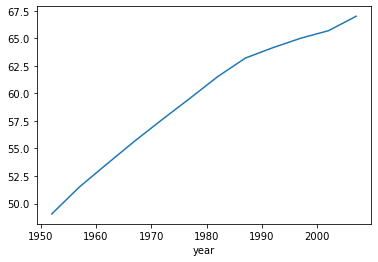

In [ ]:
### 2-4 그래프 그리기
%matplotlib inline
import matplotlib.pyplot as plt

global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)

global_yearly_life_expectancy.plot()

# 시리즈 만들기([리스트]) - pd.Series(['요소1','요소2',...])

In [ ]:
import pandas as pd
s = pd.Series(['banana', 42])
print(s)

0    banana
1        42
dtype: object


In [ ]:
s = pd.Series(['Wes McKinney', 'Creator of Pandas'])
print(s)

0         Wes McKinney
1    Creator of Pandas
dtype: object


In [ ]:
# 문자열 인덱스 만들기
s = pd.Series(['Wes McKinney', 'Creator of Pandas'], index = ['Person', 'Who'])
print(s)

Person         Wes McKinney
Who       Creator of Pandas
dtype: object


# 데이터프레임 만들기({딕셔너리}) - pd.DataFrame({...})

In [ ]:
scientist = pd.DataFrame({
    'Name' : ['Rosaline Franklin', 'William Gosset'],
    'Occupation' : ['Chemist', 'Statistician'],
    'Born' : ['1920-07-25', '1876-06-13'],
    'Died' : ['1958-04-16', '1937-10-16'],
    'Age' : [37, 61]
})
print(scientist)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1937-10-16   61


In [ ]:
# df.DataFrame(data = {'key':[]}, index=[], columns=[])
scientist = pd.DataFrame(
    data = {'Occupation' : ['Chemist', 'Statistician'],
            'Born' : ['1920-07-25', '1876-06-13'],
            'Died' : ['1958-04-16', '1937-10-16'],
            'Age' : [37, 61]},
        
    index = ['Rosaline Franklin', 'William Gosset'],
        
    columns = ['Occupation', 'Born', 'Age', 'Died']#컬럼명 지정 순서대로 DF 생성됨
)
print(scientist)

                     Occupation        Born  Age        Died
Rosaline Franklin       Chemist  1920-07-25   37  1958-04-16
William Gosset     Statistician  1876-06-13   61  1937-10-16


In [ ]:
# 딕셔너리는 키(key)와 값(Value)로 이루어진 한 쌍의 데이터들의 순서를 보장하지 않음
# 순서 보장된 딕셔너리 전달을 위해 OrderedDict 사용
from collections import OrderedDict

scientist = pd.DataFrame(OrderedDict([
    ('Name', ['Rosaline Franklin', 'William Gosset']),
    ('Occupation', ['Chemist', 'Statistician']),
    ('Born', ['1920-07-25', '1876-06-13']),
    ('Died', ['1958-04-16', '1937-10-16']),
    ('Age', [37, 61])
])
)
print(scientist)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1937-10-16   61


# 데이터프레임에서 시리즈 선택하기

In [ ]:
scientists = pd.DataFrame(
    data = {'Occupation' : ['Chemist', 'Statistician'],
            'Born' : ['1920-07-25', '1876-06-13'],
            'Died' : ['1958-04-16', '1937-10-16'],
            'Age' : [37, 61]},
    index = ['Rosaline Franklin', 'William Gosset'],
    columns = ['Occupation', 'Born', 'Died', 'Age']
)

In [ ]:
first_row = scientists.loc['William Gosset']
print(type(first_row))

<class 'pandas.core.series.Series'>


In [ ]:
print(first_row)

Occupation    Statistician
Born            1876-06-13
Died            1937-10-16
Age                     61
Name: William Gosset, dtype: object


# index, values, keys 사용하기

In [ ]:
#index 속성
print(first_row.index)

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')


In [ ]:
#values 속성
print(first_row.values)

['Statistician' '1876-06-13' '1937-10-16' 61]


In [ ]:
#keys 메서드 : index 속성과 같은 역할
print(first_row.keys())

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')


In [ ]:
#index속성 응용
print(first_row.index[0])

Occupation


In [ ]:
#keys메서드 응용
print(first_row.keys()[0])

Occupation


# 시리즈의 mean, min, max, std 메서드 사용하기

In [ ]:
print(scientists)

                     Occupation        Born        Died  Age
Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
William Gosset     Statistician  1876-06-13  1937-10-16   61


In [ ]:
ages = scientists['Age']
print(ages)

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64


In [ ]:
# 시리즈를 구성하는 자료형이 숫자라면 mean/min/max/std 등 통계 메서드 사용가능
print(ages.mean())
print(ages.min())
print(ages.max())
print(ages.std())

49.0
37
61
16.97056274847714


# 시리즈와 불린 추출 사용하기

In [ ]:
# 추출할 데이터의 인덱스를 모를 때
scientists = pd.read_csv('./data/scientists.csv')
print(scientists)

                   Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician


In [ ]:
ages = scientists['Age']
print(ages.max())
print(ages.mean())

90
59.125


In [ ]:
#평균나이보다 나이많은 데이터 추출
print(ages[ages > ages.mean()])

1    61
2    90
3    66
7    77
Name: Age, dtype: int64


In [ ]:
#추출과정
print(ages > ages.mean())

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool


In [ ]:
manual_bool_values = [True, True, False, False, True, True, False, True]
print(ages[manual_bool_values])

# 시리즈에 참/거짓 리스트를 붙이면, 참 인덱스의 데이터를 추출할 수 있음

0    37
1    61
4    56
5    45
7    77
Name: Age, dtype: int64


# 시리즈와 브로드캐스팅
### 브로트캐스팅(Broadcasting) : 시리즈, 데이터프레임 내 모든 데이터 연산
### 벡터 : 시리즈 처럼 여러 값을 가진 데이터
### 스칼라 : 단순 크기를 나타내는 데이터

##### 같은 길이 벡터 브로드캐스팅

In [ ]:
print(ages + ages)
# 결과값으로 같은 길이의 벡터 출력

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


In [ ]:
print(ages * ages)

0    1369
1    3721
2    8100
3    4356
4    3136
5    2025
6    1681
7    5929
Name: Age, dtype: int64


##### 벡터와 스칼라 브로드캐스팅

In [ ]:
print(ages + 100)

0    137
1    161
2    190
3    166
4    156
5    145
6    141
7    177
Name: Age, dtype: int64


In [ ]:
print(ages * 2)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


##### 다른 길이 벡터 연산

In [ ]:
print(pd.Series([1, 100]))

0      1
1    100
dtype: int64


In [ ]:
print(ages + pd.Series([1, 100]))
#길이가 같은 0,1까지만 연산, 길이가 다른 2~7은 누락값(NaN)으로 처리됨

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64


In [ ]:
# sort_index(ascending=False) : 인덱스 역순 데이터 정렬
rev_ages = ages.sort_index(ascending=False)
print(rev_ages)

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64


In [ ]:
print(ages * 2)

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


In [ ]:
print(ages + rev_ages)
# 연산은 동일한자리끼리 연산이 아님 > 인덱스가 일치하는 값끼리 연산을 함

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64


# 데이터프레임과 불린 추출

In [ ]:
print(scientists[scientists['Age'] > scientists['Age'].mean()])

                   Name        Born        Died  Age     Occupation
1        William Gosset  1876-06-13  1937-10-16   61   Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90          Nurse
3           Marie Curie  1867-11-07  1934-07-04   66        Chemist
7          Johann Gauss  1777-04-30  1855-02-23   77  Mathematician


In [ ]:
print(scientists.loc[[True, True, False, True]])
# 이코드는 에러코드네

IndexError: Boolean index has wrong length: 4 instead of 8

# 데이터프레임과 브로드캐스팅

##### 데이터프레임 스칼라 브로드캐스팅

In [ ]:
print(scientists * 2)
# 문자는 2번씩, 숫자는 2배가 됨

                                       Name                  Born  \
0        Rosaline FranklinRosaline Franklin  1920-07-251920-07-25   
1              William GossetWilliam Gosset  1876-06-131876-06-13   
2  Florence NightingaleFlorence Nightingale  1820-05-121820-05-12   
3                    Marie CurieMarie Curie  1867-11-071867-11-07   
4                Rachel CarsonRachel Carson  1907-05-271907-05-27   
5                        John SnowJohn Snow  1813-03-151813-03-15   
6                    Alan TuringAlan Turing  1912-06-231912-06-23   
7                  Johann GaussJohann Gauss  1777-04-301777-04-30   

                   Died  Age                            Occupation  
0  1958-04-161958-04-16   74                        ChemistChemist  
1  1937-10-161937-10-16  122              StatisticianStatistician  
2  1910-08-131910-08-13  180                            NurseNurse  
3  1934-07-041934-07-04  132                        ChemistChemist  
4  1964-04-141964-04-14  112     

# 3-5 시리즈와 데이터프레임 데이터 처리

In [ ]:
print(scientists)
print(scientists['Born'].dtype)
print(scientists['Died'].dtype)
#문자열로 저장된 데이터에 시간 관련 작업을 위해 datetime 자료형으로 변환

                     Occupation        Born        Died  Age
Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
William Gosset     Statistician  1876-06-13  1937-10-16   61
object
object


In [ ]:
###pd.to_datetime(데이터프레임명['컬럼명'], format='포맷양식')
born_dateime = pd.to_datetime(scientists['Born'], format = '%Y-%m-%d')
print(born_dateime)

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]


In [ ]:
###pd.to_datetime(데이터프레임명['컬럼명'], format='포맷양식')
died_dateime = pd.to_datetime(scientists['Died'], format = '%Y-%m-%d')
print(died_dateime)

0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]


In [ ]:
print(scientists.shape)

(8, 5)


In [ ]:
###데이터프레임에 born_dt, died_dt 추가
scientists['born_dt'], scientists['died_dt'] = (born_dateime, died_dateime)
print(scientists.head())

                   Name        Born        Died  Age    Occupation    born_dt  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37       Chemist 1920-07-25   
1        William Gosset  1876-06-13  1937-10-16   61  Statistician 1876-06-13   
2  Florence Nightingale  1820-05-12  1910-08-13   90         Nurse 1820-05-12   
3           Marie Curie  1867-11-07  1934-07-04   66       Chemist 1867-11-07   
4         Rachel Carson  1907-05-27  1964-04-14   56     Biologist 1907-05-27   

     died_dt  
0 1958-04-16  
1 1937-10-16  
2 1910-08-13  
3 1934-07-04  
4 1964-04-14  


In [ ]:
print(scientists.shape)

(8, 7)


In [ ]:
scientists['age_days_dt'] = (scientists['died_dt'] - scientists['born_dt'])
print(scientists)

                   Name        Born        Died  Age          Occupation  \
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist   
1        William Gosset  1876-06-13  1937-10-16   61        Statistician   
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse   
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist   
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist   
5             John Snow  1813-03-15  1858-06-16   45           Physician   
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist   
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician   

     born_dt    died_dt age_days_dt  
0 1920-07-25 1958-04-16  13779 days  
1 1876-06-13 1937-10-16  22404 days  
2 1820-05-12 1910-08-13  32964 days  
3 1867-11-07 1934-07-04  24345 days  
4 1907-05-27 1964-04-14  20777 days  
5 1813-03-15 1858-06-16  16529 days  
6 1912-06-23 1954-06-07  15324 days  
7 1777-04-3

In [ ]:
###shuffle(데이터프레임명['섞을컬럼명']) : 시리즈, 데이터프레임 데이터 섞기
print(scientists['Age'])

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64


In [ ]:
import random

random.seed(42)
random.shuffle(scientists['Age'])
print(scientists['Age'])

0    66
1    56
2    41
3    77
4    90
5    45
6    37
7    61
Name: Age, dtype: int64


c:\Users\Mok\anaconda3\lib\random.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i], x[j] = x[j], x[i]


In [ ]:
###df명.drop(['컬럼명'], axis = 1) : 데이터프레임 열 삭제, axis = 1 열 전체 삭제 옵션
print(scientists.columns)

Index(['Name', 'Born', 'Died', 'Age', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')


In [ ]:
scientists_dropped = scientists.drop(['Age'], axis=1)
    #drop메서드는 열 삭제 이후 df를 반환함
print(scientists_dropped.columns)
print(scientists_dropped)
#age 컬럼이 삭제

Index(['Name', 'Born', 'Died', 'Occupation', 'born_dt', 'died_dt',
       'age_days_dt'],
      dtype='object')
                   Name        Born        Died          Occupation  \
0     Rosaline Franklin  1920-07-25  1958-04-16             Chemist   
1        William Gosset  1876-06-13  1937-10-16        Statistician   
2  Florence Nightingale  1820-05-12  1910-08-13               Nurse   
3           Marie Curie  1867-11-07  1934-07-04             Chemist   
4         Rachel Carson  1907-05-27  1964-04-14           Biologist   
5             John Snow  1813-03-15  1858-06-16           Physician   
6           Alan Turing  1912-06-23  1954-06-07  Computer Scientist   
7          Johann Gauss  1777-04-30  1855-02-23       Mathematician   

     born_dt    died_dt age_days_dt  
0 1920-07-25 1958-04-16  13779 days  
1 1876-06-13 1937-10-16  22404 days  
2 1820-05-12 1910-08-13  32964 days  
3 1867-11-07 1934-07-04  24345 days  
4 1907-05-27 1964-04-14  20777 days  
5 1813-03-15 1858-06

# 3-6 데이터 저장&불러오기

### 데이터 피클, CSV, TSV 파일로 save & load

#### df명 or 시리즈명.to_pickle('경로') : 피클로 데이터 저장
###### 피클 : 바이너리 형태로 직렬화한 오프젝트 데이터 저장기법, 스프레드시트보다 더 작은 용량으로 데이터 저장이 가능

In [ ]:
#df 일부 컬럼 pickle 저장
names = scientists['Name']
names.to_pickle('./output/scientists_names_series.pickle')

In [ ]:
#데이터 프레임 전체 pickle 저장
scientists.to_pickle('./output/scientists_df.pickle')

#### pd.read_pickle('경로') : 피클 데이터 불러오기
###### 피클은 바이너리 형태의 오브젝트 이므로, read_pickle 메서드로 읽기 가능(편집기로 읽으면 깨짐)

In [ ]:
scientists_names_from_pickle = pd.read_pickle('./output/scientists_names_series.pickle')
print(scientists_names_from_pickle)

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object


In [ ]:
scientists_from_pickle = pd.read_pickle('./output/scientists_df.pickle')
print(scientists_from_pickle)

                   Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician


#### 시리즈 or df.to_csv('경로.csv') : CSV 파일로 저장
#### 시리즈 or df.to_csv('경로.tsv', sep = '\t') : TSV 파일로 저장(확장자와 sep 옵션 추가 설정)
###### CSV : 쉼표로 구분, TSV : 탭으로 구분

In [ ]:
#CSV저장
names.to_csv('./output/scientists_names_series.csv')
#TSV저장
scientists.to_csv('./output/scientists_df.tsv', sep='\t')

### df명.to_excel('경로') : 데이터 프레임 엑셀 파일 저장
###### 시리즈는 엑셀 구조와 맞지 않아 저장 불가

In [ ]:
#xls 파일 저장시
%pip install xlwt

#xlsx 파일 저장시
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
names_df = names.to_frame()

import xlwt
names_df.to_excel('./output/scientists_names_series_df_xls.xls')

import openpyxl
names_df.to_excel('./output/scientists_names_series_df_xlsx.xlsx')

C:\Users\Mok\AppData\Local\Temp/ipykernel_17468/1550028297.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  names_df.to_excel('./output/scientists_names_series_df_xls.xls')


# 4 그래프
#### 4-1 데이터 시각화
#### 4-2 matplotlib
#### 4-3 seaborn
#### 4-4 데이터프레임&시리즈 그래프 적용
#### 4-5 seaborn 그래프 스타일 설정

### 4-1 데이터 시각화

In [ ]:
#앤스콤 데이터 집합 그래프그리기
import seaborn as sns

anscombe = sns.load_dataset('anscombe')
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [ ]:
#%matplotlib notebook
#%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# dataset 컬럼 I만 추출
dataset_1 = anscombe[anscombe['dataset'] == 'I']

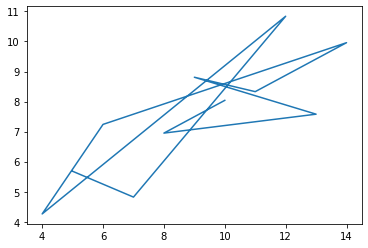

In [ ]:
#plot dafault값으로 선 그래프 출력
plt.plot(dataset_1['x'], dataset_1['y'])

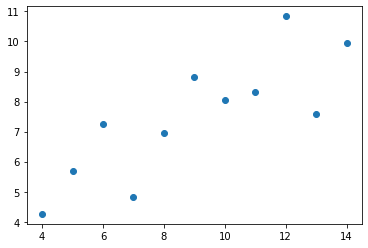

In [ ]:
#점 그래프로 바꿔보자
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

### matplotlib 라이브러리 그래프 그리기
    1. 전체 그래프가 위치할 기본 틀 생성
    2. 그래프를 그려넣을 격자 생성
    3. 그래프 하나씩 추가(그래프 추가 순서 : 왼쪽 > 오른쪽 방향)
    4. 격자의 첫행이 꽉 차면 두번째 행에 그래프를 그려넣음

In [ ]:
# dataset II, III, IV 모두 추출
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

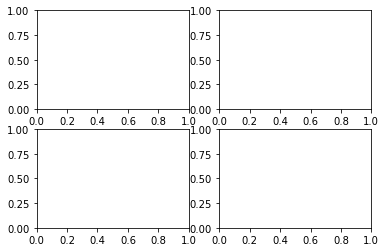

In [ ]:
# 1.그래프 기본 틀 생성
fig = plt.figure()
# 2.격자 생성
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)


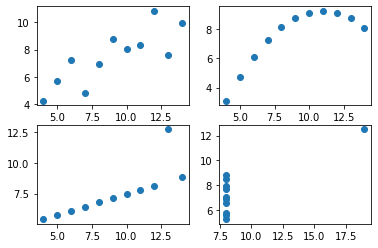

In [ ]:
# 3,4 그래프 생성
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

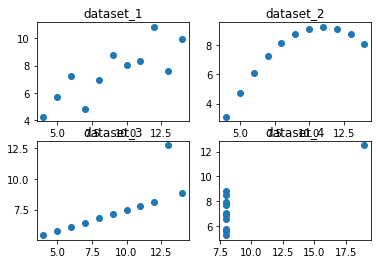

In [ ]:
# 타이틀 설정
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

fig

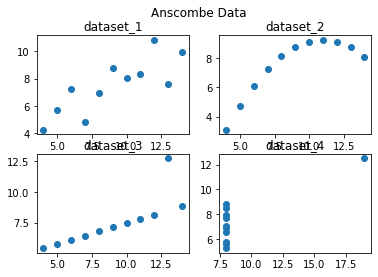

In [ ]:
# 기본 틀(fig) 제목 추가
fig.suptitle('Anscombe Data')
fig

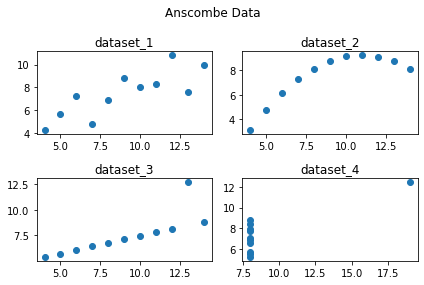

In [ ]:
#겹치는 줄 간격조정
fig.tight_layout()
fig

### 4-2 matplotlib 라이브러리

In [ ]:
tips = sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Total Bill')

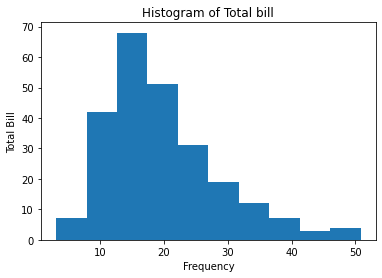

In [ ]:
#히스토그램 그래프
fig = plt.figure()  #그래프 기본 틀 생성
axes1 = fig.add_subplot(1, 1, 1)    #격자 구성


axes1.hist(tips['total_bill'], bins=10) #hist() : 히스토그램, bins=10 : x축 간격 10
axes1.set_title('Histogram of Total bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

#fig

Text(0, 0.5, 'Tip')

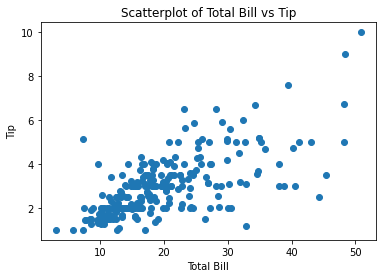

In [ ]:
#산점도(scatter) 그래프
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

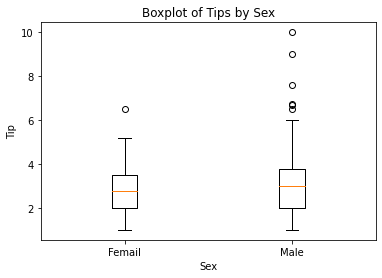

In [ ]:
#박스(boxplot) 그래프 : 이산형/연속형 변수 함게 사용하는 그래프
    #이산형 변수 : Female, Male 처럼 명확하게 구분되는 값
    #연속형 변수 : 명확하게 셀 수 없는 범위의 값
    
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
               tips[tips['sex'] == 'Male']['tip']],
               labels = ['Femail', 'Male']
               )

axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

In [ ]:
#다변량 그래프 : 3개 이상의 변수를 사용하는 다변량 그래프
    #앞서 산점도에서는 지불금액(total bill)과 팁(tip)만으로 산점도를 그림
        #성별을 추가해서 산점도를 그리고 싶다면? > 점의 색상을 다르게 하거나, 점의 크기 등을 다르게 조정
        
#산점도 그래프에 성별 추가
    #0,1 같은 정수를 사용해 점의 색상 조정(문자열로 색상을 지정할 수 없음)
        #문자열을 정수로 치환하는 함수를 이용할 것    

def recode_sex(sex):
    if sex == 'Femail':
        return 0
    else:
        return 1
    
#recode_sex 메서드 리턴값을 데이터프레임에 추가 > sex_color
    #sex_color열에 recode_sex 메서드를 브로드캐스팅 하기 위해 apply 메서드 사용
tips['sex_color'] = tips['sex'].apply(recode_sex)

Text(0, 0.5, 'Tip')

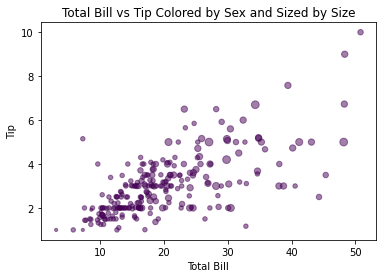

In [ ]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10,      #점의 크기
    c = tips['sex_color'],      #점의 색상
    alpha = 0.5                 #점의 투명도
)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

### 4-3 seaborn 라이브러리
###### seaborn은 matplotlib를 기반으로 만든 라이브러리

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips')

##### 단변량 그래프

c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

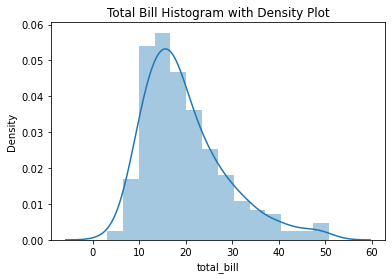

In [ ]:
#단변량 그래프 - 히스토그램
    #seaborn 히스토그램: subplots, distplot 메서드를 사용
        #subplots : 기본 틀 생성
        #distplot 메서드에 total_bill 열 데이터 전달
        
ax = plt.subplots()        #기본 틀 생성
ax = sns.distplot(tips['total_bill'])   #히스토그램 + 밀집도 그래프
ax.set_title('Total Bill Histogram with Density Plot')

c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

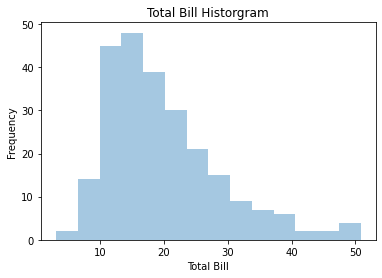

In [ ]:
#히스토그램만 나타내기(밀집도 제거 : kde=False)
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=False)
ax.set_title('Total Bill Historgram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

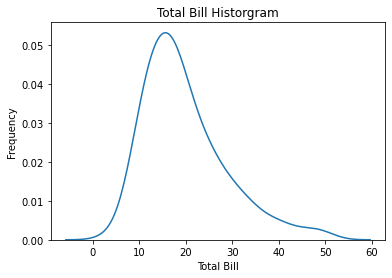

In [ ]:
#밀집도만 나타내기(히스토그램 제거 : hist=False)
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist=False)
ax.set_title('Total Bill Historgram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

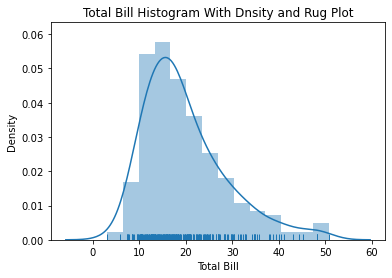

In [ ]:
#양탄자(rug) 그래프 추가
    #양탄자 그래프 : 데이터의 밀집 정도를 표현이라는데 잘모르겠음
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram With Dnsity and Rug Plot')
ax.set_xlabel('Total Bill')

c:\Users\Mok\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

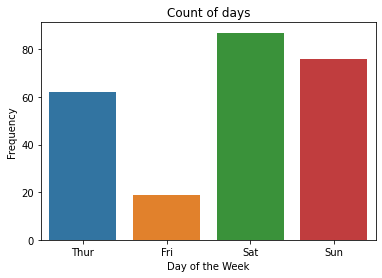

In [ ]:
#히스토그램과 비슷한 count 그래프
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

##### 이변량 그래프

Text(0, 0.5, 'Tip')

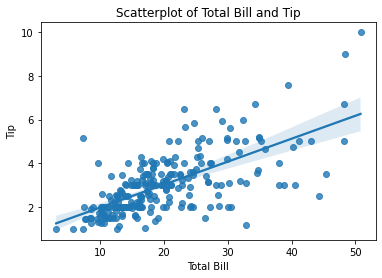

In [ ]:
#regplot : seaborn 산점도
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

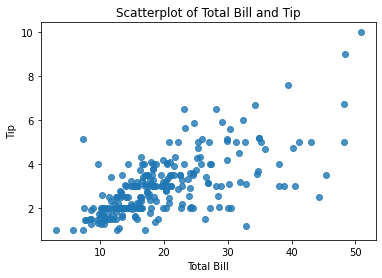

In [ ]:
#회귀선 제거
ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False) #fit_reg = False : 회귀선 제거
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0.5, 1.03, 'Joint Plot of Total bill and Tip')

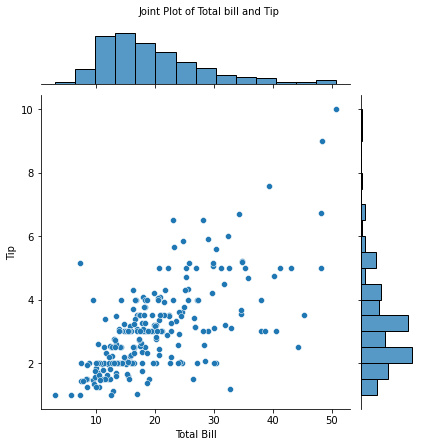

In [ ]:
#jointplot : 산점도와 히스토그램 한번에 그리기
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total bill and Tip', fontsize=10, y=1.03)

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

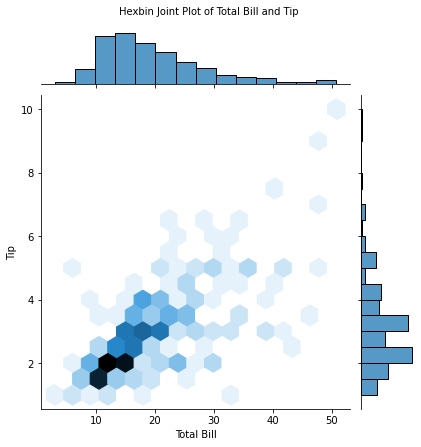

In [ ]:
#육각그래프(hexbin) : kind = hex
    #산점도는 점이 겹치면 보기 어려움 > 육각그래프로 그려보자
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

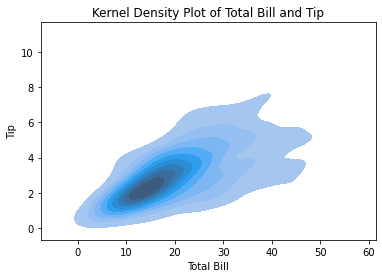

In [ ]:
#kdeplot() : 이차원 밀집도
ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'],
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Average total bill')

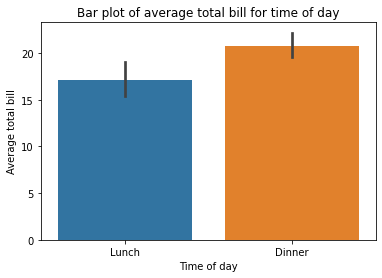

In [ ]:
#barplot() : 바 그래프, 지정한 변수의 평균을 계산하여 그림
ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

Text(0, 0.5, 'Total Bill')

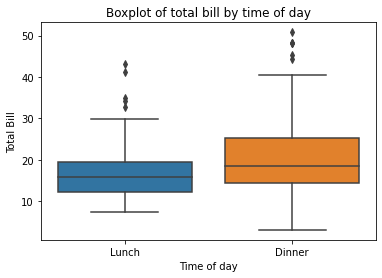

In [ ]:
#boxplot() : 박스 그래프, 최소값, 1분위수, 중간값, 3분위수, 최대값, 이상치 등 표현
ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')


Text(0, 0.5, 'Total Bill')

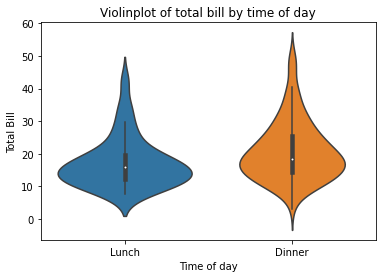

In [ ]:
#violinplot() : 박스그래프에서 분산을 표현하기 위한 그래프
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violinplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')


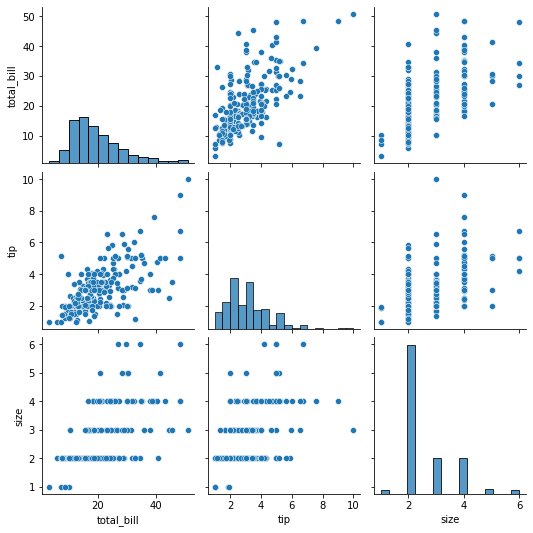

In [ ]:
#pairplot() : 관계 그래프
fig = sns.pairplot(tips)

c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions

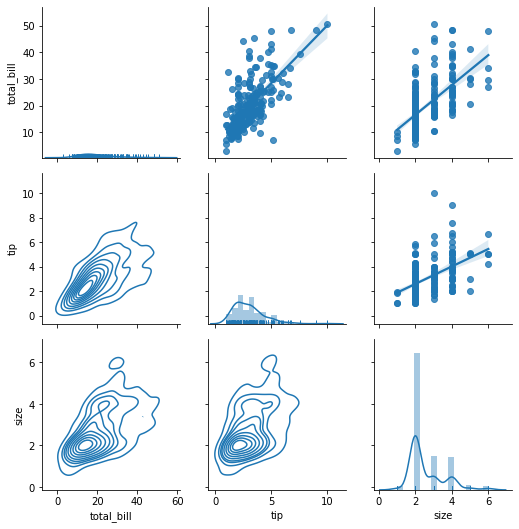

In [ ]:
#좌상 > 우하 대각선 그으면 그래프가 중복되는 단점이 있음
    #중복된 그래프 위치 지정하여, 원하는 그래프로 대체 가능
    
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)    #대각선 기준 상단 : 산점도
pair_grip = pair_grid.map_lower(sns.kdeplot)    #대각선 기준 하단 : 이차원밀집도
pair_grid = pair_grip.map_diag(sns.distplot, rug=True)  #대각선 라인 : 히스토그램
plt.show()

##### 다변량 그래프 그리기

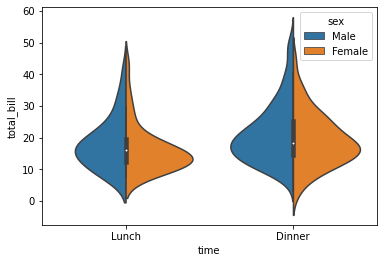

In [ ]:
#violinplot() - 색상추가
    #hue 인자값으로 색상에 사용할 열 이름 추가
ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

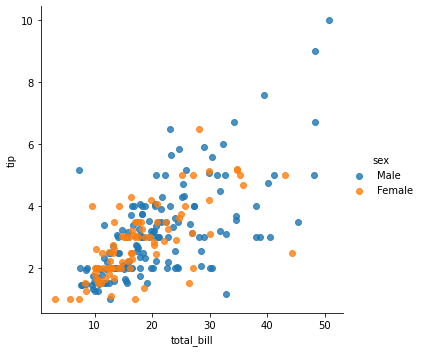

In [ ]:
#산점도 - 색상추가
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

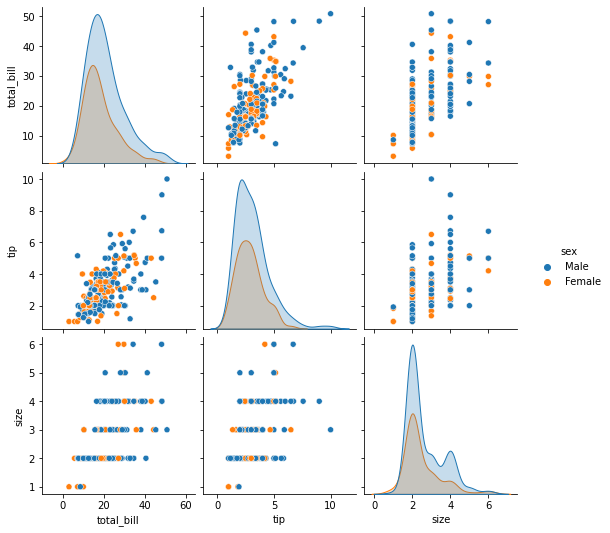

In [ ]:
#관계그래프 - 색상추가
fig = sns.pairplot(tips, hue='sex')

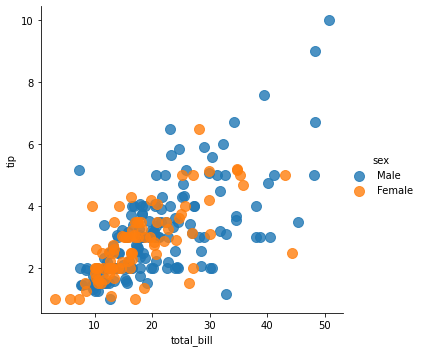

In [ ]:
#scatter_kws = {'s' : 크기} : 산점도 - 점 크기 조절
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                     scatter_kws = {'s': 100}) 
plt.show()

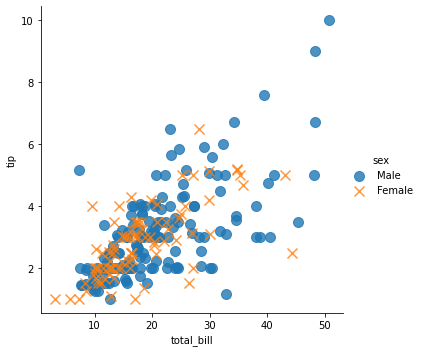

In [ ]:
#markers = ['o', 'x'] : 산점도 - 모양 조절
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex',
                     markers=['o','x'], scatter_kws={'s': 100}) 
plt.show()

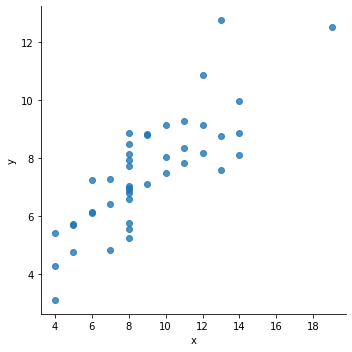

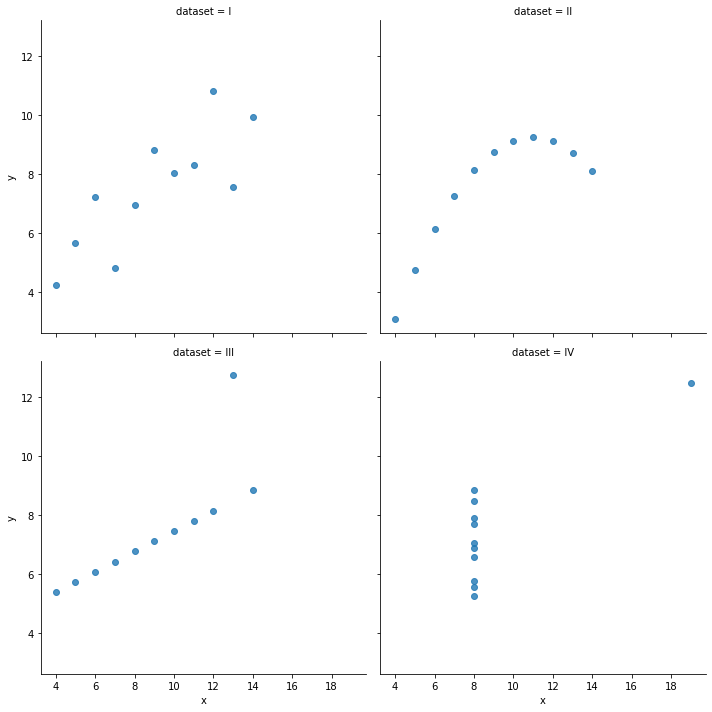

In [ ]:
#그룹별 그래프 나누어 그리기
anscombe_plot = sns.lmplot(x='x',y='y', data=anscombe, fit_reg=False)
    #col, col_warp 인자 설정 : col_warp=표현할줄(1이면 세로 1줄로 나옴)
anscombe_plot = sns.lmplot(x='x',y='y', data=anscombe, fit_reg=False,
                           col='dataset', col_wrap=2)

c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Mok\anaconda3\lib\site-packages\seaborn\distributions

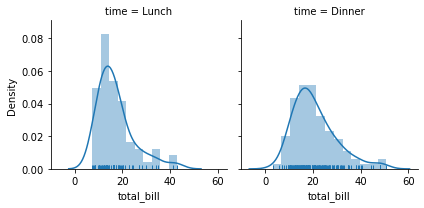

In [ ]:
#FacetGrid 클래스 그룹별 그래프 그리기
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

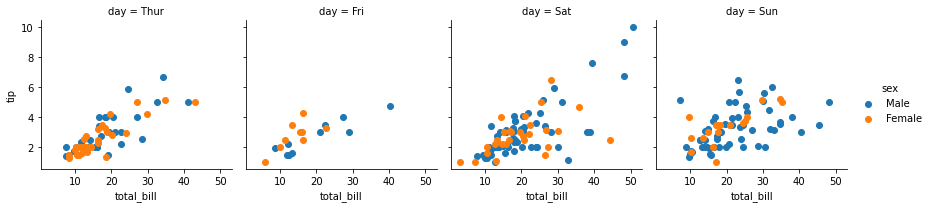

In [ ]:
#FacetGrid 다변량 그래프
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

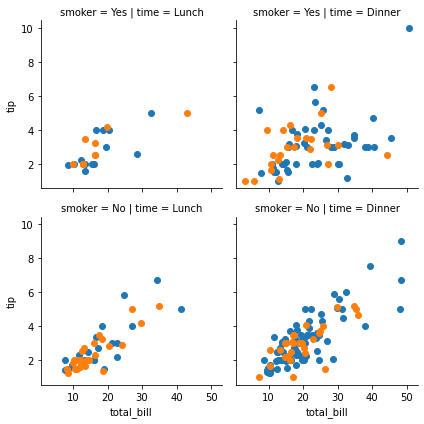

In [ ]:
#FacetGrid 더 많은 변수 그래프
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

##### 4-4 데이터프레임과 시리즈 그래프

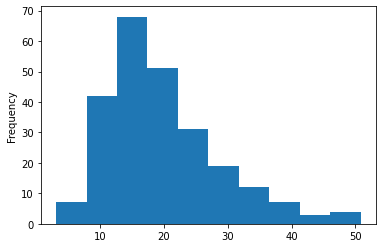

In [ ]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

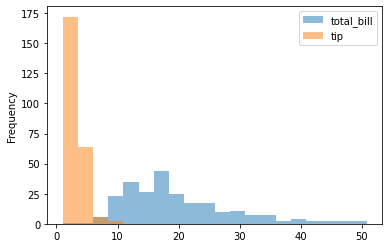

In [ ]:
#alpha : 투명도
#bins : x축 간격
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins = 20, ax=ax)

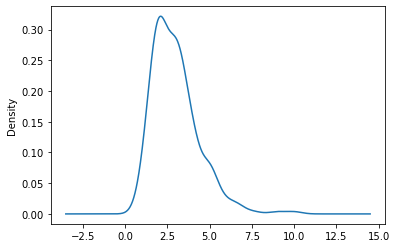

In [ ]:
#kde : 밀집도
ax = plt.subplots()
ax = tips['tip'].plot.kde()

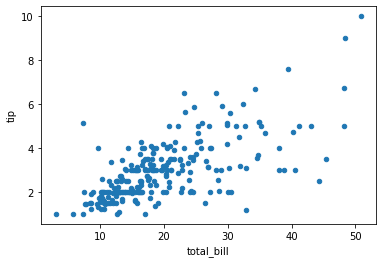

In [ ]:
#scatter : 산점도
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

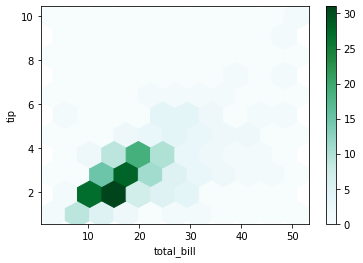

In [ ]:
#hexbin : 육각 그래프, gridsize : 육각형 크기
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)

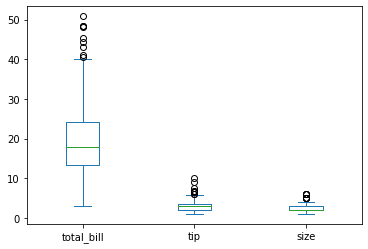

In [ ]:
#box : 박스 그래프
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

##### 4-5 seaborn 라이브러리 그래프 스타일 설정
###### set_style('스타일종류) : 스타일종류 5가지 darkgrid / whitegrid / dark / white / ticks

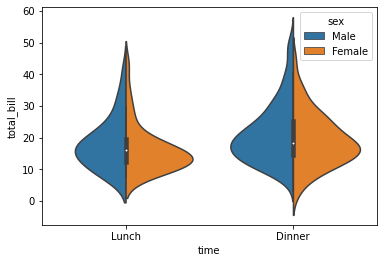

In [ ]:
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

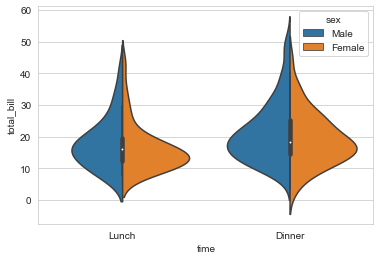

In [ ]:
#whitegrid : 그래프 배경 가로 줄
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True)

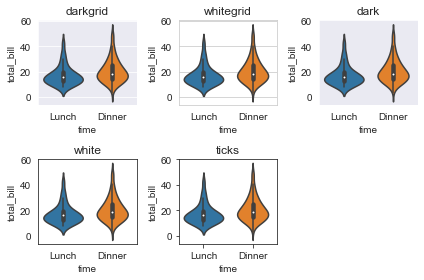

In [ ]:
#for 문을 이용해 5가지 스타일 출력해보기
fig = plt.figure()

seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style)

fig.tight_layout()

구글 seaborn documentation / matplotlib documentation 공식 문서 참고

# 데이터 연결

## 5-1 분석하기 좋은 데이터

### 깔끔한 데이터(Tidy Data) 조건
    - 데이터 분석 목적에 맞는 데이터를 모아 새로운 표(Table)로 만듦
    - 측정한 값은 행(row)을 구성
    - 변수는 열(column)을 구성

## 5-2 데이터 연결 기초

### concat 메서드 데이터 연결

In [ ]:
import pandas as pd

df1 = pd.read_csv('./data/concat_1.csv')
df2 = pd.read_csv('./data/concat_2.csv')
df3 = pd.read_csv('./data/concat_3.csv')

In [ ]:
# concat([df명,df명,...])
row_concat = pd.concat([df1, df2, df3]) #concat메서드는 데이터프레임을 위/아래로 연결 > columns명이 유지됨
print(row_concat)

     A    B    C    D
0   a0   b0   c0   d0
1   a1   b1   c1   d1
2   a2   b2   c2   d2
3   a3   b3   c3   d3
0   a4   b4   c4   d4
1   a5   b5   c5   d5
2   a6   b6   c6   d6
3   a7   b7   c7   d7
0   a8   b8   c8   d8
1   a9   b9   c9   d9
2  a10  b10  c10  d10
3  a11  b11  c11  d11


In [ ]:
print(row_concat.iloc[3,])  #데이터프레임 4번째 행 추출

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object


In [ ]:
#데이터프레임에 시리즈 연결
new_row_series = pd.Series(['n1', 'n2', 'n3', 'n4'])
print(new_row_series)

0    n1
1    n2
2    n3
3    n4
dtype: object


In [ ]:
print(pd.concat([df1, new_row_series])) #가로로 붙을것 같지만, 세로로 붙음
#행이 1개라도 반드시 데이터프레임에 담아 연결할 것
    #시리즈엔 열 이름이 없으므로, 시리즈를 새로운 열로 간주함

     A    B    C    D    0
0   a0   b0   c0   d0  NaN
1   a1   b1   c1   d1  NaN
2   a2   b2   c2   d2  NaN
3   a3   b3   c3   d3  NaN
0  NaN  NaN  NaN  NaN   n1
1  NaN  NaN  NaN  NaN   n2
2  NaN  NaN  NaN  NaN   n3
3  NaN  NaN  NaN  NaN   n4


In [ ]:
#1개 행 데이터프레임 생성 및 연결
new_row_df = pd.DataFrame([['n1', 'n2', 'n3' ,'n4']], columns=['A', 'B', 'C', 'D'])
print(new_row_df)

    A   B   C   D
0  n1  n2  n3  n4


In [ ]:
print(pd.concat([df1, new_row_df]))

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
0  n1  n2  n3  n4


In [ ]:
#concat은 한번에 2개 이상의 데이터프레임을 연결시키는 메서드
    #연결할 데이터프레임이 1개라면 append로도 가능
print(df1.append(new_row_df))

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
0  n1  n2  n3  n4


C:\Users\Mok\AppData\Local\Temp/ipykernel_19220/166026566.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df1.append(new_row_df))


In [ ]:
#딕셔너리를 사용하면 append메서드를 더욱 간편하게 연결할 수 있음
    #ignore_index = True 옵션 사용시, 인덱스도 깔끔하게 정리됨(위에선 0으로 append, 아래는 4로 깔끔하게 붙음)
data_dict = {'A':'n1', 'B':'n2', 'C':'n3', 'D':'n4'}
print(df1.append(data_dict, ignore_index=True))

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  n1  n2  n3  n4


C:\Users\Mok\AppData\Local\Temp/ipykernel_19220/1026727350.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df1.append(data_dict, ignore_index=True))


### 다양한 방법으로 데이터 연결

In [ ]:
#ignore_index : 데이터 연결 후, 인덱스를 0부터 재 지정
row_concat_i = pd.concat([df1, df2, df3], ignore_index=True)
print(row_concat_i)

      A    B    C    D
0    a0   b0   c0   d0
1    a1   b1   c1   d1
2    a2   b2   c2   d2
3    a3   b3   c3   d3
4    a4   b4   c4   d4
5    a5   b5   c5   d5
6    a6   b6   c6   d6
7    a7   b7   c7   d7
8    a8   b8   c8   d8
9    a9   b9   c9   d9
10  a10  b10  c10  d10
11  a11  b11  c11  d11


In [ ]:
#axis = 1 : 열방향 데이터 연결(좌/우로)
col_concat = pd.concat([df1, df2, df3], axis=1)
print(col_concat)

    A   B   C   D   A   B   C   D    A    B    C    D
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11


In [ ]:
#위 concat에서 특정 칼럼을 추출하면, 해당 칼럼명을 가진 데이터가 모두 추출됨
print(col_concat['A'])

    A   A    A
0  a0  a4   a8
1  a1  a5   a9
2  a2  a6  a10
3  a3  a7  a11


In [ ]:
#새로운 열 추가
col_concat['new_col_list'] = ['n1', 'n2', 'n3' ,'n4']
print(col_concat)

    A   B   C   D   A   B   C   D    A    B    C    D new_col_list
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8           n1
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9           n2
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10           n3
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11           n4


In [ ]:
#axis = 1 & ignore_index=True : 열 이름 재지정
print(pd.concat([df1, df2, df3], axis=1, ignore_index=True))

   0   1   2   3   4   5   6   7    8    9    10   11
0  a0  b0  c0  d0  a4  b4  c4  d4   a8   b8   c8   d8
1  a1  b1  c1  d1  a5  b5  c5  d5   a9   b9   c9   d9
2  a2  b2  c2  d2  a6  b6  c6  d6  a10  b10  c10  d10
3  a3  b3  c3  d3  a7  b7  c7  d7  a11  b11  c11  d11


##### 공통 열 & 공통 인덱스 만 연결


In [ ]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']
print(df1)
print(type(df1))
print(df2)
print(type(df2))
print(df3)
print(type(df3))

In [ ]:
#전체 column 합쳐지고, 누락값(NaN) 발생
row_concat = pd.concat([df1, df2, df3])
print(row_concat)

     A    B    C    D    E    F    G    H
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2  NaN  NaN  NaN  NaN
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN
0  NaN  NaN  NaN  NaN   a4   b4   c4   d4
1  NaN  NaN  NaN  NaN   a5   b5   c5   d5
2  NaN  NaN  NaN  NaN   a6   b6   c6   d6
3  NaN  NaN  NaN  NaN   a7   b7   c7   d7
0   a8  NaN   b8  NaN  NaN   c8  NaN   d8
1   a9  NaN   b9  NaN  NaN   c9  NaN   d9
2  a10  NaN  b10  NaN  NaN  c10  NaN  d10
3  a11  NaN  b11  NaN  NaN  c11  NaN  d11


In [ ]:
#데이터프레임 공통열만 골라 연결하면 누락값 발생X
    #join 인자를 inner로 지정
print(pd.concat([df1, df2, df3], join='inner'))
    #df1 & df2 & df3 공통 column이 없어서 출력되지 않음

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]


In [ ]:
#df1 & df3 연결
print(pd.concat([df1, df3], ignore_index=False, join='inner'))

     A    C
0   a0   c0
1   a1   c1
2   a2   c2
3   a3   c3
0   a8   b8
1   a9   b9
2  a10  b10
3  a11  b11


In [ ]:
#데이터프레임 행방향 연결
df1.index = [0, 1, 2, 3]
df2.index = [4, 5, 6, 7]
df3.index = [0, 2, 5, 7]

print(df1)
print(df2)
print(df3)

    A   B   C   D
0  a0  b0  c0  d0
1  a1  b1  c1  d1
2  a2  b2  c2  d2
3  a3  b3  c3  d3
    E   F   G   H
4  a4  b4  c4  d4
5  a5  b5  c5  d5
6  a6  b6  c6  d6
7  a7  b7  c7  d7
     A    C    F    H
0   a8   b8   c8   d8
2   a9   b9   c9   d9
5  a10  b10  c10  d10
7  a11  b11  c11  d11


In [ ]:
col_concat = pd.concat([df1, df2, df3], axis=1)
print(col_concat)

     A    B    C    D    E    F    G    H    A    C    F    H
0   a0   b0   c0   d0  NaN  NaN  NaN  NaN   a8   b8   c8   d8
1   a1   b1   c1   d1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2   a2   b2   c2   d2  NaN  NaN  NaN  NaN   a9   b9   c9   d9
3   a3   b3   c3   d3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN   a4   b4   c4   d4  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN   a5   b5   c5   d5  a10  b10  c10  d10
6  NaN  NaN  NaN  NaN   a6   b6   c6   d6  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN   a7   b7   c7   d7  a11  b11  c11  d11


In [ ]:
#df1, df3 공통 행만 연결
print(pd.concat([df1, df3], axis=1, join='inner'))

    A   B   C   D   A   C   F   H
0  a0  b0  c0  d0  a8  b8  c8  d8
2  a2  b2  c2  d2  a9  b9  c9  d9


##### 외부조인과 내부조인
    내부조인(inner join)
         : 둘 이상의 데이터프레임에서 조건에 맞는 행을 연결하는 것
    외부조인(outer join)
         : 두 데이터 프레임에서 기준을 정하고, 기준에 따라 왼쪽외부조인/오른쪽외부조인/완전외부조인으로 나뉨
         : 왼쪽외부조인(left outer join)은 데이터프레임 연결 시, 왼쪽 데이터프레임을 모두 포함/연결
         : 오른쪽외부조인(right outer join)은 데이터프레임 연결 시, 오른쪽 데이터프레임을 모두 포함/연결
         : 완전외부조인(full outer join)은 데이터프레임 연결 시, 왼/오른쪽 데이터프레임을 모두 포함하여 연결

## 5-3 데이터연결 마무리

### merge 메서드

In [ ]:
# 특정 위치의 날씨정보 데이터집합 불러오기
    #person : 관측자 이름
    #site : 관측위치
    #visited : 관측 날짜
    #servey : 날씨 정보
    
person = pd.read_csv('./data/survey_person.csv')
site = pd.read_csv('./data/survey_site.csv')
survey = pd.read_csv('./data/survey_survey.csv')
visited = pd.read_csv('./data/survey_visited.csv')

print(person)
print()
print(site)
print()
print(visited)
print()
print(survey)


      ident   personal    family
0      dyer    William      Dyer
1        pb      Frank   Pabodie
2      lake   Anderson      Lake
3       roe  Valentina   Roerich
4  danforth      Frank  Danforth

    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40

   ident   site       dated
0    619   DR-1  1927-02-08
1    622   DR-1  1927-02-10
2    734   DR-3  1939-01-07
3    735   DR-3  1930-01-12
4    751   DR-3  1930-02-26
5    752   DR-3         NaN
6    837  MSK-4  1932-01-14
7    844   DR-1  1932-03-22

    taken person quant  reading
0     619   dyer   rad     9.82
1     619   dyer   sal     0.13
2     622   dyer   rad     7.80
3     622   dyer   sal     0.09
4     734     pb   rad     8.41
5     734   lake   sal     0.05
6     734     pb  temp   -21.50
7     735     pb   rad     7.22
8     735    NaN   sal     0.06
9     735    NaN  temp   -26.00
10    751     pb   rad     4.35
11    751     pb  temp   -18.50
12    751   lake   sal     0.10
13 

In [ ]:
#visited는 일부만 차용
visited_subset = visited.loc[[0,2,6],]
print(visited_subset)

   ident   site       dated
0    619   DR-1  1927-02-08
2    734   DR-3  1939-01-07
6    837  MSK-4  1932-01-14


##### merge메서드
    - merge메서드는 기본적으로 내부조인을 실행
    - 메서드를 사용한 데이터프레임(site)을 왼쪽으로 지정
    - 첫번째 인자값으로 지정한 데이터프레임(visited_subset)을 오른쪽으로 지정
    - left_on, right_on 인자는 값이 일치해야 할 왼쪽과 오른쪽 데이터프레임의 열을 지정
        즉, 왼쪽 데이터프레임(site)의 열(name)과
        오른쪽 데이터프레임(visited)의 열(site)의 값이 일치하면 왼쪽 데이터프레임을 기준으로 연결

In [ ]:
o2o_merge = site.merge(visited_subset, left_on='name', right_on='site')
print(o2o_merge)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
2  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


In [ ]:
#site merge visited
m2o_merge = site.merge(visited, left_on='name', right_on='site')
print(m2o_merge)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-1 -49.85 -128.57    622   DR-1  1927-02-10
2   DR-1 -49.85 -128.57    844   DR-1  1932-03-22
3   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
4   DR-3 -47.15 -126.72    735   DR-3  1930-01-12
5   DR-3 -47.15 -126.72    751   DR-3  1930-02-26
6   DR-3 -47.15 -126.72    752   DR-3         NaN
7  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


In [ ]:
#person merge survey
ps = person.merge(survey, left_on='ident', right_on='person')
print(ps)

   ident   personal   family  taken person quant  reading
0   dyer    William     Dyer    619   dyer   rad     9.82
1   dyer    William     Dyer    619   dyer   sal     0.13
2   dyer    William     Dyer    622   dyer   rad     7.80
3   dyer    William     Dyer    622   dyer   sal     0.09
4     pb      Frank  Pabodie    734     pb   rad     8.41
5     pb      Frank  Pabodie    734     pb  temp   -21.50
6     pb      Frank  Pabodie    735     pb   rad     7.22
7     pb      Frank  Pabodie    751     pb   rad     4.35
8     pb      Frank  Pabodie    751     pb  temp   -18.50
9   lake   Anderson     Lake    734   lake   sal     0.05
10  lake   Anderson     Lake    751   lake   sal     0.10
11  lake   Anderson     Lake    752   lake   rad     2.19
12  lake   Anderson     Lake    752   lake   sal     0.09
13  lake   Anderson     Lake    752   lake  temp   -16.00
14  lake   Anderson     Lake    837   lake   rad     1.46
15  lake   Anderson     Lake    837   lake   sal     0.21
16   roe  Vale

In [ ]:
#visited merge survey
vs = visited.merge(survey, left_on='ident', right_on='taken')
print(vs)

    ident   site       dated  taken person quant  reading
0     619   DR-1  1927-02-08    619   dyer   rad     9.82
1     619   DR-1  1927-02-08    619   dyer   sal     0.13
2     622   DR-1  1927-02-10    622   dyer   rad     7.80
3     622   DR-1  1927-02-10    622   dyer   sal     0.09
4     734   DR-3  1939-01-07    734     pb   rad     8.41
5     734   DR-3  1939-01-07    734   lake   sal     0.05
6     734   DR-3  1939-01-07    734     pb  temp   -21.50
7     735   DR-3  1930-01-12    735     pb   rad     7.22
8     735   DR-3  1930-01-12    735    NaN   sal     0.06
9     735   DR-3  1930-01-12    735    NaN  temp   -26.00
10    751   DR-3  1930-02-26    751     pb   rad     4.35
11    751   DR-3  1930-02-26    751     pb  temp   -18.50
12    751   DR-3  1930-02-26    751   lake   sal     0.10
13    752   DR-3         NaN    752   lake   rad     2.19
14    752   DR-3         NaN    752   lake   sal     0.09
15    752   DR-3         NaN    752   lake  temp   -16.00
16    752   DR

In [ ]:
#left_on, right_on 전달값은 여러개여도 무방
ps_vs = ps.merge(vs, left_on=['ident', 'taken', 'quant', 'reading'],
                 right_on=['person', 'ident', 'quant', 'reading'])
print(ps_vs)


   ident_x   personal   family  taken_x person_x quant  reading  ident_y  \
0     dyer    William     Dyer      619     dyer   rad     9.82      619   
1     dyer    William     Dyer      619     dyer   sal     0.13      619   
2     dyer    William     Dyer      622     dyer   rad     7.80      622   
3     dyer    William     Dyer      622     dyer   sal     0.09      622   
4       pb      Frank  Pabodie      734       pb   rad     8.41      734   
5       pb      Frank  Pabodie      734       pb  temp   -21.50      734   
6       pb      Frank  Pabodie      735       pb   rad     7.22      735   
7       pb      Frank  Pabodie      751       pb   rad     4.35      751   
8       pb      Frank  Pabodie      751       pb  temp   -18.50      751   
9     lake   Anderson     Lake      734     lake   sal     0.05      734   
10    lake   Anderson     Lake      751     lake   sal     0.10      751   
11    lake   Anderson     Lake      752     lake   rad     2.19      752   
12    lake  

In [ ]:
print(ps_vs.loc[0,])
#ps_vs의 첫번째 행을 보면 양측 df의 중복된 열(ident, taken, person)에 접미사 _x, _y가 붙은게 보임
    # _x는 왼쪽 df(ps)로부터, _y는 오른쪽 df(vs)로 부터 가져온 열임을 의미

ident_x           dyer
personal       William
family            Dyer
taken_x            619
person_x          dyer
quant              rad
reading           9.82
ident_y            619
site              DR-1
dated       1927-02-08
taken_y            619
person_y          dyer
Name: 0, dtype: object


# 누락값 처리

### 6-1 누락값

In [ ]:
# 누락값(NaN, NAN, nan)
from numpy import NaN, NAN, nan

In [ ]:
# 누락값은 0, ''등과는 개념적으로 다름, 누락값은 '데이터 자체가 없다'는 하나의 독립적 개념
print(NaN == True)
print(NaN == False)
print(NaN == 0)
print(NaN == '')

False
False
False
False


In [ ]:
# 누락값은 값 자체가 없기 때문에 자기 자신과 비교해도 False출력
print(NaN == NaN)
print(NaN == nan)
print(NaN == NAN)
print(nan == NAN)


False
False
False
False


In [ ]:
# pd.isnull(value) : 누락값 확인방법
import pandas as pd
print(pd.isnull(NaN))
print(pd.isnull(nan))
print(pd.isnull(NAN))


True
True
True


In [ ]:
# pd.notnull(value) : 반대의경우(누락값 없는경우) 확인법
print(pd.notnull(NaN))
print(pd.notnull(42))
print(pd.notnull('missing'))

False
True
True


### 누락값이 생기는 이유

##### 누락값이 있는 데이터 집합을 연결하는 경우

In [ ]:
visited = pd.read_csv('./data/survey_visited.csv')
survey = pd.read_csv('./data/survey_survey.csv')

print(visited)
print()
print(survey)

In [ ]:
vs = visited.merge(survey, left_on='ident', right_on='taken')
print(vs)

    ident   site       dated  taken person quant  reading
0     619   DR-1  1927-02-08    619   dyer   rad     9.82
1     619   DR-1  1927-02-08    619   dyer   sal     0.13
2     622   DR-1  1927-02-10    622   dyer   rad     7.80
3     622   DR-1  1927-02-10    622   dyer   sal     0.09
4     734   DR-3  1939-01-07    734     pb   rad     8.41
5     734   DR-3  1939-01-07    734   lake   sal     0.05
6     734   DR-3  1939-01-07    734     pb  temp   -21.50
7     735   DR-3  1930-01-12    735     pb   rad     7.22
8     735   DR-3  1930-01-12    735    NaN   sal     0.06
9     735   DR-3  1930-01-12    735    NaN  temp   -26.00
10    751   DR-3  1930-02-26    751     pb   rad     4.35
11    751   DR-3  1930-02-26    751     pb  temp   -18.50
12    751   DR-3  1930-02-26    751   lake   sal     0.10
13    752   DR-3         NaN    752   lake   rad     2.19
14    752   DR-3         NaN    752   lake   sal     0.09
15    752   DR-3         NaN    752   lake  temp   -16.00
16    752   DR

##### 데이터 입력시 누락값 생기는 경우

In [ ]:
num_legs = pd.Series({'goat':4, 'amoeba':nan})
print(num_legs)
print(type(num_legs))

goat      4.0
amoeba    NaN
dtype: float64
<class 'pandas.core.series.Series'>


In [ ]:
scientists = pd.DataFrame({
    'name':['Rosaline Franklin', 'William Gosset'],
    'Occupation':['Chemist', 'Statistician'],
    'Born':['1920-07-25', '1876-06-13'],
    'Died':['1958-04-16', '1937-10-16'],
    'missing':[NaN, nan]
})

print(scientists)
print(type(scientists))

                name    Occupation        Born        Died  missing
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16      NaN
1     William Gosset  Statistician  1876-06-13  1937-10-16      NaN
<class 'pandas.core.frame.DataFrame'>


##### 범위 지정, 데이터 추출 시 누락값 생기는 경우

In [ ]:
# 데이터프레임에 존재하지 않는 데이터를 추출하면 누락값이 생김
gapminder = pd.read_csv('./data/gapminder.tsv', sep='\t')

In [ ]:
life_exp = gapminder.groupby(['year'])['lifeExp'].mean()
print(life_exp)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [ ]:
print(life_exp.loc[range(2000, 2010),])

KeyError: '[2000, 2001, 2003, 2004, 2005, 2006, 2008, 2009] not in index'

In [ ]:
y2000 = life_exp[life_exp.index > 2000]
print(y2000)

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


### 누락값 개수 구하기

In [ ]:
# 정상데이터 개수
ebola = pd.read_csv('./data/country_timeseries.csv')
print(ebola.count())

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64


In [ ]:
# shape[0] : 전체행의 데이터 개수
    #shape[0] - 정상데이터 개수 : 누락값의 개수
num_rows = ebola.shape[0]
num_missing = num_rows - ebola.count()
print(num_missing)

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64


##### numpy를 이용해 누락값 개수 구하기


In [ ]:
import numpy as np
print(np.count_nonzero(ebola.isnull())) #count_nonzero : 0이 아닌 값의 개수를 세는 메서드

# ebola.isnull()가 T/F를 리턴 > np.count_nonzero가 True의 숫자를 합산

In [ ]:
print(np.count_nonzero(ebola['Cases_Guinea'].isnull()))

29


### 누락값 처리하기

##### fillna() : 누락값 변경

In [ ]:
print(ebola.fillna(0).iloc[0:10, 0:5])  #fillna(0) : nan > 0으로 변경

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            0.0            10030.0
1    1/4/2015  288        2775.0            0.0             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           0.0         8157.0                0.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0            0.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0            0.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [ ]:
#fillna(method='ffill') : 직전 행값으로 현재 행 nan 대체, 첫값이 누락값이면 처리하지 못한다는 단점
print(ebola.fillna(method='ffill').iloc[0:10, 0:5])

#Cases_Liberia열 0,1은 이전값이 없어서 대체하지 못함
    #6, 8은 각 이전값으로 대체한 값임

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2769.0         8157.0             9722.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         8018.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7977.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [ ]:
#fillna(method='bill') : 직후 행값으로 현재 행 nan 대체, 마지막 값이 누락값이면 처리하지 못한다는 단점
print(ebola.fillna(method='bfill').iloc[0:10, 0:5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0         8166.0            10030.0
1    1/4/2015  288        2775.0         8166.0             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2730.0         8157.0             9633.0
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         7977.0             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7862.0             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


In [ ]:
# interpolate() : 누락값 이전, 이후 값으로 중간값 구해서 대체
print(ebola.interpolate().iloc[0:10, 0:5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286        2749.5         8157.0             9677.5
4  12/31/2014  284        2730.0         8115.0             9633.0
5  12/28/2014  281        2706.0         8018.0             9446.0
6  12/27/2014  280        2695.0         7997.5             9409.0
7  12/24/2014  277        2630.0         7977.0             9203.0
8  12/21/2014  273        2597.0         7919.5             9004.0
9  12/20/2014  272        2571.0         7862.0             8939.0


##### 누락값 삭제 : dropna
    누락값 삭제의 경우, 데이터 편향, 표본수 감소 등의 문제가 발생할 수 있음
    분석자의 적절한 판단이 필요

In [ ]:
print(ebola.shape)

(122, 18)


In [ ]:
ebola_dropna = ebola.dropna()
print(ebola_dropna.shape)

(1, 18)


In [ ]:
print(ebola_dropna) #너무 많은 데이터가 삭제됨

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
19  11/18/2014  241        2047.0         7082.0             6190.0   

    Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
19           20.0            1.0                 4.0          1.0         6.0   

    Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
19         1214.0          2963.0              1267.0             8.0   

    Deaths_Senegal  Deaths_UnitedStates  Deaths_Spain  Deaths_Mali  
19             0.0                  1.0           0.0          6.0  


### 누락값이 포함된 데이터 계산

In [ ]:
# Cases_Guinea + Cases_Liberia + Cases_SierraLeone 3행을 합쳐 Cases_multiple 행 추가
ebola['Cases_multiple'] = ebola['Cases_Guinea'] + ebola['Cases_Liberia'] + ebola['Cases_SierraLeone']

In [ ]:
ebola_subset = ebola.loc[:, ['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_multiple']]
print(ebola_subset.head(n=10))

#하나의행이라도 NaN있으면 합결과가 NaN이 됨 > 누락값이 더 많아진 결과

   Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_multiple
0        2776.0            NaN            10030.0             NaN
1        2775.0            NaN             9780.0             NaN
2        2769.0         8166.0             9722.0         20657.0
3           NaN         8157.0                NaN             NaN
4        2730.0         8115.0             9633.0         20478.0
5        2706.0         8018.0             9446.0         20170.0
6        2695.0            NaN             9409.0             NaN
7        2630.0         7977.0             9203.0         19810.0
8        2597.0            NaN             9004.0             NaN
9        2571.0         7862.0             8939.0         19372.0


In [ ]:
# skipna = True : 누락값 무시한 채 계산
print(ebola.Cases_Guinea.sum(skipna = True))

print(ebola.Cases_Guinea.sum(skipna = False))

84729.0
nan


# 깔끔한 데이터
    7-1 열과 피벗
    7-2 열 이름 관리
    7-3 여러 열 하나로 정리
    7-4 중복 데이터 처리
    7-5 대용량 데이터 처리

### 7-1 열과 피벗

In [ ]:
# 데이터프레임의 열 : 파이썬의 변수와 비슷한 역할
    #ex) ebola 데이터프레임 열 : 사망날짜(Date), 발병국(Case_Guinea) 등 데이터 저장
    
# 넓은 데이터 : 데이터프레임의 열 자체가 값을 의미
    #ex) 넓은 데이터 열 : <10$, <10-20$, <20-30$, ...

##### melt 메서드 : 데이터프레임 정리에 유용한 메서드
    melt 메서드 인자
        id_vars : 위치를 그대로 유지할 열의 이름 지정
        value_vars : 행으로 위치를 변경할 열의 이름 지정
        var_name : value_vars로 위치를 변경할 열 이름 지정
        value_name : var_name으로 위치 변경할 열의 데이터를 저장할 열 이름 지정

##### 1개의 열만 고정하고 나머지 열을 행으로 바꾸기

In [ ]:
# melt 메서드 사용 : 11개의 넓은데이터 데이터프레임 예시
import pandas as pd
pew = pd.read_csv('./data/pew.csv')
print(pew.head())

             religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k  $50-75k  \
0            Agnostic     27       34       60       81       76      137   
1             Atheist     12       27       37       52       35       70   
2            Buddhist     27       21       30       34       33       58   
3            Catholic    418      617      732      670      638     1116   
4  Don’t know/refused     15       14       15       11       10       35   

   $75-100k  $100-150k  >150k  Don't know/refused  
0       122        109     84                  96  
1        73         59     74                  76  
2        62         39     53                  54  
3       949        792    633                1489  
4        21         17     18                 116  


In [ ]:
# 6열까지만
print(pew.iloc[:, 0:6])

                   religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k
0                  Agnostic     27       34       60       81       76
1                   Atheist     12       27       37       52       35
2                  Buddhist     27       21       30       34       33
3                  Catholic    418      617      732      670      638
4        Don’t know/refused     15       14       15       11       10
5          Evangelical Prot    575      869     1064      982      881
6                     Hindu      1        9        7        9       11
7   Historically Black Prot    228      244      236      238      197
8         Jehovah's Witness     20       27       24       24       21
9                    Jewish     19       19       25       25       30
10            Mainline Prot    289      495      619      655      651
11                   Mormon     29       40       48       51       56
12                   Muslim      6        7        9       10        9
13    

In [ ]:
# 종교와 소득정보 출력됨
    # 소득정보 열을 행데이터로 옮기고 싶다면?
pew_long = pd.melt(pew, id_vars='religion')
print(pew_long.head())
#소득 정보 열이 행데이터(value)열로 정리됨
    # religion열을 고정하여 피벗했다 라고 표현함

             religion variable  value
0            Agnostic    <$10k     27
1             Atheist    <$10k     12
2            Buddhist    <$10k     27
3            Catholic    <$10k    418
4  Don’t know/refused    <$10k     15
                  religion            variable  value
0                 Agnostic               <$10k     27
1                  Atheist               <$10k     12
2                 Buddhist               <$10k     27
3                 Catholic               <$10k    418
4       Don’t know/refused               <$10k     15
..                     ...                 ...    ...
175               Orthodox  Don't know/refused     73
176        Other Christian  Don't know/refused     18
177           Other Faiths  Don't know/refused     71
178  Other World Religions  Don't know/refused      8
179           Unaffiliated  Don't know/refused    597

[180 rows x 3 columns]


##### varibale, value 열 이름 바꾸기

In [ ]:
#variable > income, value > count 로 columns명 변경
pew_long = pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
print(pew_long.head())

             religion income  count
0            Agnostic  <$10k     27
1             Atheist  <$10k     12
2            Buddhist  <$10k     27
3            Catholic  <$10k    418
4  Don’t know/refused  <$10k     15


##### 2개 이상의 열 고정, 나머지 열을 행으로 바꾸기

In [ ]:
billboard = pd.read_csv('./data/billboard.csv')
print(billboard.iloc[0:5, 0:16])

   year        artist                    track  time date.entered  wk1   wk2  \
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   87  82.0   
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   91  87.0   
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08   81  70.0   
3  2000  3 Doors Down                    Loser  4:24   2000-10-21   76  76.0   
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15   57  34.0   

    wk3   wk4   wk5   wk6   wk7   wk8   wk9  wk10  wk11  
0  72.0  77.0  87.0  94.0  99.0   NaN   NaN   NaN   NaN  
1  92.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  68.0  67.0  66.0  57.0  54.0  53.0  51.0  51.0  51.0  
3  72.0  69.0  67.0  65.0  55.0  59.0  62.0  61.0  61.0  
4  25.0  17.0  17.0  31.0  36.0  49.0  53.0  57.0  64.0  


In [ ]:
# year, artist, track, time, date.entered 열 고정
    #나머지열(wk1, wk2,...) 피벗
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'time', 'date.entered'],
                         var_name = 'week', value_name='rating')
print(billboard_long.head())

   year        artist                    track  time date.entered week  rating
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02  wk1    91.0
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08  wk1    81.0
3  2000  3 Doors Down                    Loser  4:24   2000-10-21  wk1    76.0
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15  wk1    57.0


### 7-2 열 이름 관리

##### 하나의 열이 여러 의미를 가질때

In [ ]:
#ebola df의 Deaths_Guinea열은 '사망자수'와 '나라이름'을 합쳐 만든 이름
ebola = pd.read_csv('./data/country_timeseries.csv')
print(ebola.columns)

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')


In [ ]:
print(ebola.iloc[:5, [0, 1, 2, 3, 10, 11]])

         Date  Day  Cases_Guinea  Cases_Liberia  Deaths_Guinea  Deaths_Liberia
0    1/5/2015  289        2776.0            NaN         1786.0             NaN
1    1/4/2015  288        2775.0            NaN         1781.0             NaN
2    1/3/2015  287        2769.0         8166.0         1767.0          3496.0
3    1/2/2015  286           NaN         8157.0            NaN          3496.0
4  12/31/2014  284        2730.0         8115.0         1739.0          3471.0


In [ ]:
#Date와 Day고정 나머지를 행으로 피벗 > 각 나라별 사망자수를 행으로 볼 수 있어짐
ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
print(ebola_long)

            Date  Day      variable   value
0       1/5/2015  289  Cases_Guinea  2776.0
1       1/4/2015  288  Cases_Guinea  2775.0
2       1/3/2015  287  Cases_Guinea  2769.0
3       1/2/2015  286  Cases_Guinea     NaN
4     12/31/2014  284  Cases_Guinea  2730.0
...          ...  ...           ...     ...
1947   3/27/2014    5   Deaths_Mali     NaN
1948   3/26/2014    4   Deaths_Mali     NaN
1949   3/25/2014    3   Deaths_Mali     NaN
1950   3/24/2014    2   Deaths_Mali     NaN
1951   3/22/2014    0   Deaths_Mali     NaN

[1952 rows x 4 columns]


##### split 메서드로 열 이름 분리

In [ ]:
#Cases_Guinea 같이 언더바(_)로 구분되어 2개 이상의 의미를 가진 열 split으로 분리
variable_split = ebola_long.variable.str.split('_')
print(variable_split)

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object


In [ ]:
print(type(variable_split))
print(type(variable_split[0]))
#variable_split의 자료형은 시리즈, 각 시리즈 값은 리스트형태

<class 'pandas.core.series.Series'>
<class 'list'>


In [ ]:
#각 리스트의 0번째 인덱스는 발병(Cases)/죽음(Death)와 같은 상태를 의미
    #1번째 인덱스는 나라이름
status_values = variable_split.str.get(0)
country_values = variable_split.str.get(1)

print(status_values[:5])
print(status_values[-5:])
print(country_values[:5])
print(country_values[-5:])

0    Cases
1    Cases
2    Cases
3    Cases
4    Cases
Name: variable, dtype: object
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, dtype: object
0    Guinea
1    Guinea
2    Guinea
3    Guinea
4    Guinea
Name: variable, dtype: object
1947    Mali
1948    Mali
1949    Mali
1950    Mali
1951    Mali
Name: variable, dtype: object


In [ ]:
ebola_long['status'] = status_values
ebola_long['country'] = country_values
print(ebola_long.head())

         Date  Day      variable   value status country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea


In [ ]:
# 참고) concat 메서드로 데이터프레임 열 추가하는 방법
variable_split = ebola_long.variable.str.split('_', expand=True)
variable_split.columns = ['status', 'country']
ebola_parsed = pd.concat([ebola_long, variable_split], axis=1)

print(ebola_parsed.head())

         Date  Day      variable   value status country status country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea  Cases  Guinea


In [ ]:
variable_split = ebola_long.variable.str.split('_', expand=False)
print(variable_split.head())

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object


### 7-3 여러 열 하나로 정리 - melt, pivot_table 메서드

In [ ]:
weather = pd.read_csv('./data/weather.csv')
print(weather.iloc[:5, :])

        id  year  month element  d1    d2    d3  d4    d5  d6  ...  d22   d23  \
0  MX17004  2010      1    tmax NaN   NaN   NaN NaN   NaN NaN  ...  NaN   NaN   
1  MX17004  2010      1    tmin NaN   NaN   NaN NaN   NaN NaN  ...  NaN   NaN   
2  MX17004  2010      2    tmax NaN  27.3  24.1 NaN   NaN NaN  ...  NaN  29.9   
3  MX17004  2010      2    tmin NaN  14.4  14.4 NaN   NaN NaN  ...  NaN  10.7   
4  MX17004  2010      3    tmax NaN   NaN   NaN NaN  32.1 NaN  ...  NaN   NaN   

   d24  d25  d26  d27  d28  d29   d30  d31  
0  NaN  NaN  NaN  NaN  NaN  NaN  27.8  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  14.5  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  

[5 rows x 35 columns]


In [ ]:
#가로로 나열된 열들을 행값으로 변경
weather_melt = pd.melt(
    weather, 
    id_vars=['id', 'year', 'month', 'element'], #고정시킬 열
    var_name='day', #행으로 모을 열들의 컬럼명
    value_name='temp'
    )  #행으로 모을 열들의 값 컬럼명
print(weather_melt.head())

        id  year  month element day  temp
0  MX17004  2010      1    tmax  d1   NaN
1  MX17004  2010      1    tmin  d1   NaN
2  MX17004  2010      2    tmax  d1   NaN
3  MX17004  2010      2    tmin  d1   NaN
4  MX17004  2010      3    tmax  d1   NaN


In [ ]:
# 열로 나타내고싶은 행데이터(element)를 위치변경
weather_tidy = weather_melt.pivot_table(
    index =['id', 'year', 'month', 'day'],   #고정시킬열
    columns = 'element', #열로 나열할 행
    values = 'temp', #열이 된 변수의 값들
    dropna = False
)
print(weather_tidy)

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d1    NaN   NaN
                   d10   NaN   NaN
                   d11   NaN   NaN
                   d12   NaN   NaN
                   d13   NaN   NaN
...                      ...   ...
             12    d5    NaN   NaN
                   d6   27.8  10.5
                   d7    NaN   NaN
                   d8    NaN   NaN
                   d9    NaN   NaN

[341 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
#reset_index로 변경한 pivot_table을 데이터프레임화
weather_tidy_flat = weather_tidy.reset_index()
print(weather_tidy_flat)

element       id  year  month  day  tmax  tmin
0        MX17004  2010      1   d1   NaN   NaN
1        MX17004  2010      1  d10   NaN   NaN
2        MX17004  2010      1  d11   NaN   NaN
3        MX17004  2010      1  d12   NaN   NaN
4        MX17004  2010      1  d13   NaN   NaN
..           ...   ...    ...  ...   ...   ...
336      MX17004  2010     12   d5   NaN   NaN
337      MX17004  2010     12   d6  27.8  10.5
338      MX17004  2010     12   d7   NaN   NaN
339      MX17004  2010     12   d8   NaN   NaN
340      MX17004  2010     12   d9   NaN   NaN

[341 rows x 6 columns]


### 7-4 중복 데이터 처리

In [ ]:
billboard = pd.read_csv('./data/billboard.csv')
print(billboard.head())

   year        artist                    track  time date.entered  wk1   wk2  \
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   87  82.0   
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   91  87.0   
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08   81  70.0   
3  2000  3 Doors Down                    Loser  4:24   2000-10-21   76  76.0   
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15   57  34.0   

    wk3   wk4   wk5  ...  wk67  wk68  wk69  wk70  wk71  wk72  wk73  wk74  \
0  72.0  77.0  87.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  92.0   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  68.0  67.0  66.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  72.0  69.0  67.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  25.0  17.0  17.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   wk75  wk76  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN 

In [ ]:
billboard_melt = pd.melt(
    billboard, 
    id_vars = ['year', 'artist' ,'track' ,'time' ,'date.entered'],
    var_name = 'week',
    value_name = 'rating'
    )

print(billboard_long.shape)
print(billboard_long.head())

(24092, 7)
   year        artist                    track  time date.entered week  rating
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02  wk1    91.0
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08  wk1    81.0
3  2000  3 Doors Down                    Loser  4:24   2000-10-21  wk1    76.0
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15  wk1    57.0


In [ ]:
#track에 Loser라는 노래 데이터가 여러개임을 확인, week/rating을 제외하면 다른행들은 같은데이터를 지님
print(billboard_long[billboard_long.track == 'Loser'].head())

      year        artist  track  time date.entered week  rating
3     2000  3 Doors Down  Loser  4:24   2000-10-21  wk1    76.0
320   2000  3 Doors Down  Loser  4:24   2000-10-21  wk2    76.0
637   2000  3 Doors Down  Loser  4:24   2000-10-21  wk3    72.0
954   2000  3 Doors Down  Loser  4:24   2000-10-21  wk4    69.0
1271  2000  3 Doors Down  Loser  4:24   2000-10-21  wk5    67.0


In [ ]:
#중복값을 갖는 열을 따로모아 데이터프레임에 저장
billboard_songs = billboard_long[['year', 'artist', 'track', 'time']]
print(billboard_songs.shape)

(24092, 4)


In [ ]:
#drop_duplicates로 데이터프레임 중복데이터 제거
billboard_songs = billboard_songs.drop_duplicates()
print(billboard_songs.shape)

(317, 4)


In [ ]:
#중복 제거 데이터프레임에 아이디(id) 추가 > 데이터 조회/구분을 쉽게 할수 있도록
billboard_songs['id'] = range(len(billboard_songs))
print(billboard_songs.head(n=10))

   year          artist                    track  time  id
0  2000           2 Pac  Baby Don't Cry (Keep...  4:22   0
1  2000         2Ge+her  The Hardest Part Of ...  3:15   1
2  2000    3 Doors Down               Kryptonite  3:53   2
3  2000    3 Doors Down                    Loser  4:24   3
4  2000        504 Boyz            Wobble Wobble  3:35   4
5  2000            98^0  Give Me Just One Nig...  3:24   5
6  2000         A*Teens            Dancing Queen  3:44   6
7  2000         Aaliyah            I Don't Wanna  4:15   7
8  2000         Aaliyah                Try Again  4:03   8
9  2000  Adams, Yolanda            Open My Heart  5:30   9


In [ ]:
#merge로 노래정보와 주간순위데이터 합침
billboard_ratings = billboard_long.merge(billboard_songs, on=['year', 'artist', 'track', 'time'])
print(billboard_ratings.shape)
print(billboard_ratings)

(24092, 8)
       year           artist                    track  time date.entered  \
0      2000            2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
1      2000            2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
2      2000            2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
3      2000            2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
4      2000            2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   
...     ...              ...                      ...   ...          ...   
24087  2000  matchbox twenty                     Bent  4:12   2000-04-29   
24088  2000  matchbox twenty                     Bent  4:12   2000-04-29   
24089  2000  matchbox twenty                     Bent  4:12   2000-04-29   
24090  2000  matchbox twenty                     Bent  4:12   2000-04-29   
24091  2000  matchbox twenty                     Bent  4:12   2000-04-29   

       week  rating   id  
0       wk1    87.0    0  
1       wk2    82.0   

### 7-5 대용량 데이터 처리

##### 여러개로 나누어진 데이터

In [ ]:
import os
import urllib.request

with open('./data/raw_data_urls2.txt', 'r') as data_urls:
    for line, url in enumerate(data_urls):
        if line == 5:   #5개만 내려받음
            break
        fn = url.split('/')[-1].strip() #'/'단위로 나누고 앞뒤 공백제거(strip)
        fp = os.path.join('', './data', fn) #파일 저장 경로 및 제목
        print(url)
        print(fp)
        urllib.request.urlretrieve(url, fp)

https://s3.amazonaws.com/nyc-tlc/csv_backup/fhv_tripdata_2015-01.csv

./data\fhv_tripdata_2015-01.csv
https://s3.amazonaws.com/nyc-tlc/csv_backup/fhv_tripdata_2015-02.csv

./data\fhv_tripdata_2015-02.csv
https://s3.amazonaws.com/nyc-tlc/csv_backup/fhv_tripdata_2015-03.csv

./data\fhv_tripdata_2015-03.csv
https://s3.amazonaws.com/nyc-tlc/csv_backup/fhv_tripdata_2015-04.csv

./data\fhv_tripdata_2015-04.csv
https://s3.amazonaws.com/nyc-tlc/csv_backup/fhv_tripdata_2015-05.csv

./data\fhv_tripdata_2015-05.csv


In [ ]:
#glob메서드 : 패턴이 동일한 파일들을 한번에 읽어들일 수 있음
import glob
nyc_taxi_data = glob.glob('./data/fhv_*')
print(nyc_taxi_data)

['./data\\fhv_tripdata_2015-01.csv', './data\\fhv_tripdata_2015-02.csv', './data\\fhv_tripdata_2015-03.csv', './data\\fhv_tripdata_2015-04.csv', './data\\fhv_tripdata_2015-05.csv']


In [ ]:
#각 파일 데이터프레임화
taxi1 = pd.read_csv(nyc_taxi_data[0])
taxi2 = pd.read_csv(nyc_taxi_data[1])
taxi3 = pd.read_csv(nyc_taxi_data[2])
taxi4 = pd.read_csv(nyc_taxi_data[3])
taxi5 = pd.read_csv(nyc_taxi_data[4])
    #이거 for문으로 못하나? global 변수선언 말고


In [ ]:
print(taxi1.head(n=2))
print(taxi2.head(n=2))
print(taxi3.head(n=2))
print(taxi4.head(n=2))
print(taxi5.head(n=2))

  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-01-01 00:30:00         NaN
1               B00013  2015-01-01 01:22:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-02-01 00:00:00         NaN
1               B00013  2015-02-01 00:01:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00029  2015-03-01 00:02:00       213.0
1               B00029  2015-03-01 00:03:00        51.0
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-04-01 04:30:00         NaN
1               B00001  2015-04-01 06:00:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-05-01 04:30:00         NaN
1               B00001  2015-05-01 05:00:00         NaN


In [ ]:
#데이터의 구조(행, 열)이 규모가 큼
print(taxi1.shape)
print(taxi2.shape)
print(taxi3.shape)
print(taxi4.shape)
print(taxi5.shape)

(2746033, 3)
(3126401, 3)
(3281427, 3)
(3917789, 3)
(4296067, 3)


In [ ]:
#데이터 전처리를 위해 각 데이터 프레임 연결
taxi = pd.concat([taxi1, taxi2, taxi3, taxi4, taxi5])
print(taxi.shape)

(17367717, 3)


##### 반복문으로 데이터 준비하기

In [ ]:
import glob
nyc_taxi_data = glob.glob('./data/fhv_*')
print(nyc_taxi_data)

#반복문을 응용하면 단 몇줄로 데이터를 준비할 수 있음
list_taxi_df = []
for csv_filename in nyc_taxi_data:
    print(csv_filename)
    df = pd.read_csv(csv_filename)
    list_taxi_df.append(df)
    
print(len(list_taxi_df))
print(type(list_taxi_df[0]))

['./data\\fhv_tripdata_2015-01.csv', './data\\fhv_tripdata_2015-02.csv', './data\\fhv_tripdata_2015-03.csv', './data\\fhv_tripdata_2015-04.csv', './data\\fhv_tripdata_2015-05.csv']
./data\fhv_tripdata_2015-01.csv
./data\fhv_tripdata_2015-02.csv
./data\fhv_tripdata_2015-03.csv
./data\fhv_tripdata_2015-04.csv
./data\fhv_tripdata_2015-05.csv
5
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(list_taxi_df[0].head())   #list_taxi_df리스트안에 5개의 df이 들어있음

  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-01-01 00:30:00         NaN
1               B00013  2015-01-01 01:22:00         NaN
2               B00013  2015-01-01 01:23:00         NaN
3               B00013  2015-01-01 01:44:00         NaN
4               B00013  2015-01-01 02:00:00         NaN


In [ ]:
taxi_loop_concat = pd.concat(list_taxi_df)
print(taxi_loop_concat.shape)   #리스트 5개로 세분되어있는 list_taxi_df를 concat으로 하나로 합침

(17367717, 3)


In [ ]:
print(taxi.equals(taxi_loop_concat))    #위에서 따로 담아 합친 taxi와의 데이터 비교

True


# 판다스 자료형
    8-1 자료형 다루기
    8-2 카테고리 자료형

### 8-1 자료형 다루기


##### 자료형 변환

In [ ]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
# astype(자료형) : 자료형변환
tips['sex_str'] = tips['sex'].astype(str)
print(tips.dtypes)  #판다스 object는 문자열(string)을 뜻함

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


In [ ]:
#자료형 변환 데이터 원복
tips['total_bill'] = tips['total_bill'].astype(str)
print(tips.dtypes)
print()

tips['total_bill'] = tips['total_bill'].astype(float)
print(tips.dtypes)

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


##### to_numeric() : 오입력 데이터 처리

In [ ]:
#정수가 있어야 하는 열에 문자열이 입력되어 있다면?
tips_sub_miss = tips.head(10)
tips_sub_miss.loc[[1, 3, 5, 7], 'total_bill'] = 'missing'   # 인덱스 1,3,5,7 행, total_bill열에 'missing'삽입
print(tips_sub_miss)

  total_bill   tip     sex smoker  day    time  size sex_str
0      16.99  1.01  Female     No  Sun  Dinner     2  Female
1    missing  1.66    Male     No  Sun  Dinner     3    Male
2      21.01  3.50    Male     No  Sun  Dinner     3    Male
3    missing  3.31    Male     No  Sun  Dinner     2    Male
4      24.59  3.61  Female     No  Sun  Dinner     4  Female
5    missing  4.71    Male     No  Sun  Dinner     4    Male
6       8.77  2.00    Male     No  Sun  Dinner     2    Male
7    missing  3.12    Male     No  Sun  Dinner     4    Male
8      15.04  1.96    Male     No  Sun  Dinner     2    Male
9      14.78  3.23    Male     No  Sun  Dinner     2    Male


C:\Users\Mok\AppData\Local\Temp/ipykernel_2176/859431142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_sub_miss.loc[[1, 3, 5, 7], 'total_bill'] = 'missing'


In [ ]:
print(tips_sub_miss.dtypes) #total_bill열에 missing을 잘못입력하면서 float64->object로 변경됨

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


In [ ]:
#astype메서드로 변경안됨(판다스는 'missing'이라는 문자열을 실수로 변환하는 방법을 모르기때문)
tips_sub_miss['total_bill'].astype(float)

ValueError: could not convert string to float: 'missing'

In [ ]:
#to_numeric메서드에서도 비슷한 오류 발생
pd.tonumeric(tips_sub_miss['total_bill'])

AttributeError: module 'pandas' has no attribute 'tonumeric'

In [ ]:
#to_numeric메서드도 문자열을 실수로 변환할수는 없음
    #그러나, errors 인자에 raise, coerce, ignore을 지정해 일정부분 오류제어가 가능
        #ex)errors='raise'로 설정하면 숫자로 변환할 수 없는 값이 있을때만 오류 발생
        #이런 오류는 개발자가 의도한 오류이므로, 발생한 지점을 정확히 알 수 있어 유용함

##### errors 인자에 설정할 수 있는값
    raise : 숫자로 변환할 수 없는 값이 있으면 오류발생
    coerce : 숫자로 변환할 수 없는 값을 누락값으로 지정
    ignore : 아무 작업도 하지 않음

In [ ]:
#errors='ignore' 하면 오류만 무시할 뿐, 자료형이 변하지는 않음
tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='ignore')
print(tips_sub_miss.dtypes)

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


C:\Users\Mok\AppData\Local\Temp/ipykernel_2176/2997841947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='ignore')


In [ ]:
#errors='coerce' : 'missing'을 숫자로 바꾸기 시도하면서 에러가 발생하는곳을 누락값(NaN)으로 대체시켜버림
tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='coerce')
print(tips_sub_miss)
print()
print(tips_sub_miss.dtypes)

   total_bill   tip     sex smoker  day    time  size sex_str
0       16.99  1.01  Female     No  Sun  Dinner     2  Female
1         NaN  1.66    Male     No  Sun  Dinner     3    Male
2       21.01  3.50    Male     No  Sun  Dinner     3    Male
3         NaN  3.31    Male     No  Sun  Dinner     2    Male
4       24.59  3.61  Female     No  Sun  Dinner     4  Female
5         NaN  4.71    Male     No  Sun  Dinner     4    Male
6        8.77  2.00    Male     No  Sun  Dinner     2    Male
7         NaN  3.12    Male     No  Sun  Dinner     4    Male
8       15.04  1.96    Male     No  Sun  Dinner     2    Male
9       14.78  3.23    Male     No  Sun  Dinner     2    Male

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


C:\Users\Mok\AppData\Local\Temp/ipykernel_2176/2432174160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], errors='coerce')


In [ ]:
#to_numeric, downcast : 정수/실수 형을 더 작은 형태로 사용
    #float64 -> float32 메모리를 더 적게 먹음
        #저장하는 실수의 예상범위가 크지않다면 다운캐스트가 효율적일 수 있음
tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'], 
                                            errors='coerce', downcast='float')
print(tips_sub_miss.dtypes)

total_bill     float32
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


C:\Users\Mok\AppData\Local\Temp/ipykernel_2176/4184260684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'],


### 8-2 카테고리 자료형

##### 카테고리 자료형 : 판다스 라이브러리에서 유한한 범위의 값만을 가질 수 있는 특수한 자료형
    용량과 속도면에서 매우 효율적
    주로 동일한 문자열이 반복되어 데이터를 구성하는 경우에 사용

In [ ]:
#문자열 > 카테고리 변환
tips['sex'] = tips['sex'].astype('str')
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    object  
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
dtypes: category(3), float64(2), int64(1), object(2)
memory usage: 10.8+ KB
None


In [ ]:
#memory 차이에 주목
tips['sex'] = tips['sex'].astype('category')
print(tips.info())
    #데이터 크기가 커질수록 카테고리형이 유리해짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 9.3+ KB
None


# 문자열 처리
    9-1 문자열 다루기
    9-2 문자열 메서드
    9-3 문자열 포매팅
    9-4 정규표현식

### 9-1 문자열 다루기
    pass

In [ ]:
word = 'grail'
sent = 'a scratch'

print(sent[::2])    #거리 2칸씩 뛰며 추출

asrth


### 9-2 문자열 메서드
    capitalize : 첫 문자를 대문자로 변환
    count : 문자열 갯수 리턴
    startswith : 문자열이 특정 문자로 시작하면 참
    endswith : 문자열이 특정 문자로 끝나면 참
    find : 찾을 문자열의 첫 인덱스 리턴, 실패시 -1 리턴
    index : find 메서드와 같은 역할 수행, 실패시 ValueError 리턴
    isalpha : 모든 문자가 알파벳이면 참
    isdecimal : 모든 문자가 숫자면 참
    isalnum : 모든 문자가 알파벳 or 숫자면 참
    lower : 모든 문자를 소문자로 변환
    upper : 모든 문자 대문자로 변환
    replace : 문자열의 문자를 다른문자로 교체
    strip : 문자열 앞/뒤 빈칸 제거
    split : 구분자 기준 문자열 나눔, 나눈 문자열 리스트 리턴
    partition : split과 비슷한 역할 수행, 구분자도 리턴
    center  :지정한 너비로 문자열 늘이고, 문자열 가운데 정렬
    zfill  :문자열의 빈칸 0으로 채움

##### 파이썬 문자열 메서드 실습

In [ ]:
#capitalize : 첫 문자를 대문자로 변환
"black Knight".capitalize()

'Black knight'

In [ ]:
#count : 문자열 갯수 리턴
"It's just a flesh wound!".count('u')


2

In [ ]:
#startswith : 문자열이 특정 문자로 시작하면 참
"Halt! Who goes there?".startswith('Halt')

True

In [ ]:
#endswith : 문자열이 특정 문자로 끝나면 참
"coconut".endswith('nut')

True

In [ ]:
#find : 찾을 문자열의 첫 인덱스 리턴, 실패시 -1 리턴
"It's just a flesh wound!".find('u')

6

In [ ]:
#index : find 메서드와 같은 역할 수행, 실패시 ValueError 리턴
"It's just a flesh wound!".index('scratch')

ValueError: substring not found

In [ ]:
#isalpha : 모든 문자가 알파벳이면 참
'old woman'.isalpha()   #False
#'oldwoman'.isalpha()   #True

False

In [ ]:
#isdecimal : 모든 문자가 숫자면 참
'37'.isdecimal()

True

In [ ]:
#isalnum : 모든 문자가 알파벳 or 숫자면 참(섞여있으면 False)
"I'm 37".isalnum()

False

In [ ]:
#lower : 모든 문자를 소문자로 변환
"Black Knight".lower()

'black knight'

In [ ]:
#upper : 모든 문자 대문자로 변환
'Black Knight'.upper()

'BLACK KNIGHT'

In [ ]:
#replace : 문자열의 문자를 다른문자로 교체
'flesh wound!'.replace('flesh wound', 'scratch')

'scratch!'

In [ ]:
#strip : 문자열 앞/뒤 빈칸 제거
" I'm not dead. ".strip()

"I'm not dead."

In [ ]:
#split : 구분자 기준 문자열 나눔, 나눈 문자열 리스트 리턴
"NI! NI! NI! NI!".split(sep=' ')

['NI!', 'NI!', 'NI!', 'NI!']

In [ ]:
#partition : split과 비슷한 역할 수행, 구분자도 리턴
"3,4".partition(',')

('3', ',', '4')

In [ ]:
#center  :지정한 너비로 문자열 늘이고, 문자열 가운데 정렬
"nine".center(10)

'   nine   '

In [ ]:
#zfill  :문자열의 빈칸 0으로 채움
"9".zfill(5)

'00009'

##### join, splitlines, replace 메서드

In [ ]:
#join 메서드 : 문자열을 연결해 새로운 문자열로 리턴
    #''.join(문자열) : join 앞 문자('')를 문자열 사이사이에 넣어 연결시켜줌
d1 = '40°'
m1 = "46'"
s1 = '52.837"'
u1 = 'N'

d2 = '73°'
m2 = "58'"
s2 = '26.302"'
u2 = 'W'

coords = ' '.join([d1, m1, s1, u1, d2, m2, s2, u2])
print(coords)

40° 46' 52.837" N 73° 58' 26.302" W


In [ ]:
#splitlines : 여러 행 문자열 분리후 리스트로 리턴
multi_str = """Guard: What? Ridden on a horse?
King Arthur: Yes!
Guard: You're using coconuts!
ing Arthur: What?
Guard: You've got ... coconut[s] and you're bangin' 'em together.
"""

print(multi_str)

Guard: What? Ridden on a horse?
King Arthur: Yes!
Guard: You're using coconuts!
ing Arthur: What?
Guard: You've got ... coconut[s] and you're bangin' 'em together.



In [ ]:
multi_str_split = multi_str.splitlines()
print(multi_str_split)

['Guard: What? Ridden on a horse?', 'King Arthur: Yes!', "Guard: You're using coconuts!", 'ing Arthur: What?', "Guard: You've got ... coconut[s] and you're bangin' 'em together."]


In [ ]:
#인덱스 슬라이싱 가능
guard = multi_str_split[::2]
print(guard)

['Guard: What? Ridden on a horse?', "Guard: You're using coconuts!", "Guard: You've got ... coconut[s] and you're bangin' 'em together."]


In [ ]:
#replace 메서드 : 위에서 추출한 문자열에 Guard: 를 없애고 싶을때
guard = multi_str.replace("Guard: ", "").splitlines()[::2]
print(guard)

['What? Ridden on a horse?', "You're using coconuts!", "You've got ... coconut[s] and you're bangin' 'em together."]


### 9-3 포매팅

##### 문자열 포매팅

In [ ]:
#문자열 포매팅 : 출력할 문자열의 형식을 지정하거나 변수를 조합하여 출력하는 방법
    #이때 사용하는 중괄호{}를 플레이스 홀더라고 지칭함
var = 'flesh wound'
s = "It's just a {}!"

print(s.format(var))
print(s.format('scratch'))

It's just a flesh wound!
It's just a scratch!


In [ ]:
s = """Black Knight: 'Tis but a {0}.
King Arthur: A {0}? Your arm's off!
"""
print(s.format('scratch'))

Black Knight: 'Tis but a scratch.
King Arthur: A scratch? Your arm's off!



In [ ]:
s = 'Hayden Planetarium Coordinates: {lat}, {lon}'
print(s.format(lat='40.7815° N', lon='73.9733° W'))

Hayden Planetarium Coordinates: 40.7815° N, 73.9733° W


##### 숫자 데이터 포매팅

In [ ]:
print('Some digits of pi: {}'.format(3.14159265359))

Some digits of pi: 3.14159265359


In [ ]:
#플레이스 홀더에 :, 를 넣어주면 숫자에 쉼표삽입 가능
print("In 2005, Lu Chao of China recited {:,} digits of pi".format(67890))

In 2005, Lu Chao of China recited 67,890 digits of pi


In [ ]:
#다양한 소수 포매팅
print("I remember {0:.4} or {0:.4%} of what Lu Chao recited".format(7/67890))
print()
print("My ID number is {0:05d}".format(42))

I remember 0.0001031 or 0.0103% of what Lu Chao recited

My ID number is 00042


##### % 연산자 포매팅

In [ ]:
s = 'I only konw %d digits of pi' % 7
print(s)

I only konw 7 digits of pi


In [ ]:
print('Some digits of %(cont)s: %(value).2f' % {'cont': 'e', 'value': 2.718})

Some digits of e: 2.72


##### f-strings 포매팅

In [ ]:
var = 'flesh wound'
s = f"It's just a {var}!"
print(s)

It's just a flesh wound!


In [ ]:
lat='40.7815° N'
lon='73.9733° W'
s = f'Hayden Planetarium Coordinates: {lat}, {lon}'
print(s)

Hayden Planetarium Coordinates: 40.7815° N, 73.9733° W


### 9-4 정규식 문자열 처리
    정규표현식 패턴 실습 사이트 : https://regex101.com

##### 기본 정규식 문법
    문법    실습코드    설명
    .       .a         문자(a) 앞, 문자 1개가 있는 패턴 검색
    ^       ^I like    문자열의 처음부터 일치하는 패턴 검색
    $       on$        문자열의 끝부분 일치하는 패턴 검색
    *       n\d*       n 이후, 숫자(\d)가 0개 이상인 패턴 검색
    +       n\d+       n 이후, 숫자(\d)가 1개 이상인 패턴 검색
    ?       apple?     ?의 앞의 문자(e)가 있거나 없는 패턴 검색
    {m}     n\d{2}     n 이후, 숫자(\d)가 2개 이상인 패턴 검색
    {m,n}   n\d{2, 4}  n 이후, 숫자(\d)가 2~4개 인 패턴 검색
    \       \*, \?, \+  문자그대로의 *, ?, +를 검색할 때 이스케이프 문자(\) 사용
    []      [cfh]all   c, f, h 중 1개를 포함하고 나머지 문자열이 all인 패턴 검색
    |       apple | application     apple이나 application 중 하나만 있는 패턴 검색(or연산)
    ()      (\d+)-(\d+)-(\d+)       ()에 지정한 패턴 찾을때 사용


##### 정규식 특수문자
    특수문자    설명
    \d          숫자 1개를 의미 == [0-9]
    \D          숫자 이외의 문자 1개 == [^0-9]
    \s          공백 1개
    \S          공백 이외의 문자 1개
    \w          알파벳 1개
    \W          알파벳 이외의 문자 1개(한글 등)

##### 정규식 메서드
    함수        설명
    search      첫번째로 찾은 패턴의 양끝 인덱스 반환
    match       문자열의 처음부터 검색하여 찾아낸 패턴의 양끝 인덱스 반환
    fullmatch   전체 문자열 일치 여부 검사
    split       지정한 패턴으로 잘라낸 문자열 리스트 반환
    findall     지정한 패턴 찾아 리스트 반환
    finditer    findall 메서드와 기능 동일, iterator를 리턴
    sub         첫번째 인자로 전달한 값(패턴)을 두번째 인자로 전달한 값(easyspub)으로 교체

In [ ]:
import re

In [ ]:
#search : 첫번째로 찾은 패턴의 양끝 인덱스 반환
test = '1234 56789 39 401'
m = re.search('[0-9]{4}', test)
print(m)
print(m.group())

<re.Match object; span=(0, 4), match='1234'>
1234


In [ ]:
#match : 문자열의 처음부터 검색하여 찾아낸 패턴의 양끝 인덱스 반환
test = '1234 56789 39 401'
m = re.match('[0-9]{4}', test)
print(m)

<re.Match object; span=(0, 4), match='1234'>


In [ ]:
#fullmatch : 전체 문자열 일치 여부 검사
test = '1234 56789 39 401'
#test = 'I like apple, I like to make application'
m = re.fullmatch('\d+\s\d+\s\d+\s\d+', test)
print(bool(m))

True


In [ ]:
#split : 지정한 패턴으로 잘라낸 문자열 리스트 반환
test = '1234 56789 39 401'
m = re.split('\s', test)
print(m)

['1234', '56789', '39', '401']


In [ ]:
#findall : 지정한 패턴 찾아 리스트 반환
test = '1234 56789 39 401'
m = re.findall('[0-9]{4}', test)
print(m)

['1234', '5678']


In [ ]:
#finditer : findall 메서드와 기능 동일, iterator를 리턴
m = re.finditer('[0-9]{4}', test)
print(m)
for match in m:
    print(match.group())


1234
5678


In [ ]:
#sub : 첫번째 인자로 전달한 값(패턴)을 두번째 인자로 전달한 값(easyspub)으로 교체
test = '1234 56789 39 401'
print(re.sub('\s', '-', test))

1234-56789-39-401


In [ ]:
##### 정규식 전화번호 패턴 찾기
import re
tele_num = '1234567890'
m = re.match(pattern='\d\d\d\d\d\d\d\d\d\d', string=tele_num)
print(type(m))
print(m)

<class 're.Match'>
<re.Match object; span=(0, 10), match='1234567890'>


In [ ]:
#match메서드로 패턴찾기에 성공하면 True반환
print(bool(m))

if m:
    print('match')
else:
    print('no match')


True
match


In [ ]:
#match메서드 패턴정보 확인
print(m.start())
print(m.end())
print(m.span())
print(m.group())

0
10
(0, 10)
1234567890


In [ ]:
tele_num_spaces = '123 456 7890'
m = re.match(pattern='\d{10}', string = tele_num_spaces)
print(m)

if m:
    print('match')
else:
    print('no match')
#숫자사이에 공백이 있어 패턴과 맞지않음

None
no match


In [ ]:
p = '\d{3}\s?\d{3}\s?\d{4}'
m = re.match(pattern = p, string = tele_num_spaces)
print(m)

<re.Match object; span=(0, 12), match='123 456 7890'>


In [ ]:
#지역코드 있는 경우
tele_num_space_paren_dash = '(123) 456-7890'
p = '\(?\d{3}\)?\s?\d{3}\s?-?\d{4}'
m = re.match(pattern=p, string = tele_num_space_paren_dash)
print(m)

<re.Match object; span=(0, 14), match='(123) 456-7890'>


In [ ]:
#국가 코드까지 있는 경우
cnty_tele_num_space_paren_dash = '+1 (123) 456-7890'
p = '\+?1\s?\(?\d{3}\)?\s?\d{3}\s?-?\d{4}'
m = re.match(pattern=p, string=cnty_tele_num_space_paren_dash)
print(m)


<re.Match object; span=(0, 17), match='+1 (123) 456-7890'>


##### compile 메서드로 정규식 사용

In [ ]:
p = re.compile('\d{10}')
s = '1234567890'
m = p.match(s)
print(m)

<re.Match object; span=(0, 10), match='1234567890'>


# apply 메서드 활용
    apply 메서드 기초
    apply 메서드 고급

##### 대용량 데이터 처리시, apply메서드가 for문보다 더 빠름

### 10-2 apply 메서드 - 기초

##### 시리즈와 apply메서드 : df[컬럼명].apply(함수, 인자), 시리즈.apply(함수, 인자)

In [ ]:
def my_sq(x):
    return x**2

def my_exp(x, n):
    return x**n

import pandas as pd

df = pd.DataFrame({'a':[10, 20, 30], 'b':[20, 30, 40]})
print(df)

    a   b
0  10  20
1  20  30
2  30  40


In [ ]:
print(df['a']**2)

0    100
1    400
2    900
Name: a, dtype: int64


In [ ]:
#정의한 함수(my_sq)가 인자 1개를 받도록 구성된 경우 > 인자값 생략
    #df['a']가 첫번째 인자값으로 자동으로 넘어가기 때문, 즉 시리즈 값이 첫번째 인자값으로 넘어감
sq = df['a'].apply(my_sq)
print(sq)

0    100
1    400
2    900
Name: a, dtype: int64


In [ ]:
#인자값 2개 전달해야 할 경우?
ex = df['a'].apply(my_exp, n=2)
print(ex)
print()
    #첫번째 인자값(x)은 생략, 두번째 인자값(n)은 지정
    
ex = df['a'].apply(my_exp, n=3)
print(ex)

0    100
1    400
2    900
Name: a, dtype: int64

0     1000
1     8000
2    27000
Name: a, dtype: int64


##### 데이터프레임과 apply메서드 : df.apply(함수, axis=0,1)

In [ ]:
df = pd.DataFrame({'a':[10,20,30], 'b':[20, 30, 40]})
print(df)

    a   b
0  10  20
1  20  30
2  30  40


In [ ]:
def print_me(x):
    print(x)

print(df.apply(print_me, axis=0))
print()
print(df.apply(print_me, axis=1))
#axis 값에 따라 함수를 열/행 방향 으로 적용할 수 있음
    #axit=0 : 열 방향 함수 적용(default)
    #axit=1 : 행 방향 함수 적용
    

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64
a    None
b    None
dtype: object

a    10
b    20
Name: 0, dtype: int64
a    20
b    30
Name: 1, dtype: int64
a    30
b    40
Name: 2, dtype: int64
0    None
1    None
2    None
dtype: object


In [ ]:
#인자 3개 입력받는 경우?
def avg_3(x, y, z):
    return (x + y + z) / 3

print(df.apply(avg_3))
    #인자 3개중, x만 열단위 데이터로 입력받았고 인자 2개가 더 필요하다는 오류 발생

TypeError: avg_3() missing 2 required positional arguments: 'y' and 'z'

In [ ]:
#인자 3개 함수내부에서 지정
def avg_3_apply(col):
    x = col[0]
    y = col[1]
    z = col[2]
    return (x + y + z) / 3

print(df.apply(avg_3_apply))

a    20.0
b    30.0
dtype: float64


In [ ]:
print(df)
print(df.shape) #(3행, 2열)

#df의 행이 3개임을 알고 아래의 함수 작성
    #일반적으로 아래처럼 함수 작성함
def avg_3_apply(col):
    sum = 0
    for item in col:
        sum += item
    return sum / df.shape[0]

    a   b
0  10  20
1  20  30
2  30  40
(3, 2)


In [ ]:
#위 함수 응용, 행함수(axis = 1)
def avg_2_apply(row):
    sum = 0
    for item in row:
        sum += item
    return sum / df.shape[1]    #행 단위 함수니까 요소가 a,b 2개, shape[1]로 열 갯수만큼 나눠줌

print(df.apply(avg_2_apply, axis = 1))

0    15.0
1    25.0
2    35.0
dtype: float64


### 10-3 apply 메서드 - 고급

##### 데이터프레임 누락값 처리 > apply 메서드 사용

###### 누락값처리 - 열방향

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [ ]:
#누락값 개수 반환 함수 정의
import numpy as np

def count_missing(vec):
    null_vec = pd.isnull(vec)
    null_count = np.sum(null_vec)
    return null_count

cmis_col = titanic.apply(count_missing)
print(cmis_col)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
#누락값 비율 계산함수 정의
def prop_missing(vec):
    num = count_missing(vec)
    dem = vec.size
    return num / dem

pmis_col = titanic.apply(prop_missing)
print(pmis_col)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64


In [ ]:
#번외) 정상값(1-누락값) 비율 함수
def prop_complete(vec):
    return 1 - prop_missing(vec)

pcom_col = titanic.apply(prop_complete)
print(pcom_col)

survived       1.000000
pclass         1.000000
sex            1.000000
age            0.801347
sibsp          1.000000
parch          1.000000
fare           1.000000
embarked       0.997755
class          1.000000
who            1.000000
adult_male     1.000000
deck           0.227834
embark_town    0.997755
alive          1.000000
alone          1.000000
dtype: float64


###### 누락값처리 - 행방향

In [ ]:
cmis_row = titanic.apply(count_missing, axis = 1)
pmis_row = titanic.apply(prop_missing, axis = 1)
pcom_row = titanic.apply(prop_complete, axis = 1)

print(cmis_row.head())
print()
print(pmis_row.head())
print()
print(pcom_row.head())

0    1
1    0
2    1
3    0
4    1
dtype: int64

0    0.066667
1    0.000000
2    0.066667
3    0.000000
4    0.066667
dtype: float64

0    0.933333
1    1.000000
2    0.933333
3    1.000000
4    0.933333
dtype: float64


In [ ]:
#누락값 개수 titanic df에 추가
titanic['num_missing'] = titanic.apply(count_missing, axis = 1)
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  num_missing  
0    man        True  NaN  Southampton    no  False            1  
1  woman       False    C    Cherbourg   yes  False            0  
2  woman       False  NaN  Southampton   yes   True            1  
3  woman       False    C  Southampton   yes  False            0  
4    man        True  NaN  Southampton    no   True            1  


In [ ]:
#각 행데이터 누락값을 추가함으로써, 누락값 있는 데이터만 추출 가능해짐
print(titanic.loc[titanic.num_missing > 1, :].sample(10))

     survived  pclass     sex  age  sibsp  parch     fare embarked   class  \
563         0       3    male  NaN      0      0   8.0500        S   Third   
358         1       3  female  NaN      0      0   7.8792        Q   Third   
602         0       1    male  NaN      0      0  42.4000        S   First   
674         0       2    male  NaN      0      0   0.0000        S  Second   
431         1       3  female  NaN      1      0  16.1000        S   Third   
538         0       3    male  NaN      0      0  14.5000        S   Third   
680         0       3  female  NaN      0      0   8.1375        Q   Third   
301         1       3    male  NaN      2      0  23.2500        Q   Third   
451         0       3    male  NaN      1      0  19.9667        S   Third   
778         0       3    male  NaN      0      0   7.7375        Q   Third   

       who  adult_male deck  embark_town alive  alone  num_missing  
563    man        True  NaN  Southampton    no   True            2  
358

# 그룹연산
    11-1 데이터 집계
    11-2 데이터 변환
    11-3 데이터 필터링
    11-4 그룹 오프젝트

##### 그룹연산 : 데이터의 '분할(splic) - 반영(Apply) - 결합(Combine)' 과정

### 11-1 데이터 집계 - groupby 메서드

In [ ]:
import pandas as pd
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [ ]:
#year열 기준 그룹화 > lifeExp 평균
avg_life_exp_by_year = df.groupby('year').lifeExp.mean()    #df.groupby('year')['lifeExp'].mean() 도 같은 결과
print(avg_life_exp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


##### 분할-반영-결합 과정 쪼개보기(feat.groupby메서드)

In [ ]:
#groupby메서드에 열이름을 전달하면 '분할'작업이 먼저 일어남
years = df.year.unique()
print(years)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


In [ ]:
#연도별 평균값 구하려면, 각 연도별 데이터 추출이 선과제
    #각 연도별 데이터 추출이 '반영'작업의 한 부분임
y1952 = df.loc[df.year == 1952, :]
print(y1952.head())

        country continent  year  lifeExp       pop    gdpPercap
0   Afghanistan      Asia  1952   28.801   8425333   779.445314
12      Albania    Europe  1952   55.230   1282697  1601.056136
24      Algeria    Africa  1952   43.077   9279525  2449.008185
36       Angola    Africa  1952   30.015   4232095  3520.610273
48    Argentina  Americas  1952   62.485  17876956  5911.315053


In [ ]:
#'반영'작업 반복 진행
y1952_mean = y1952.lifeExp.mean()
print(y1952_mean)

y1957 = df.loc[df.year == 1957, :]
y1957_mean = y1957.lifeExp.mean()
print(y1957_mean)
#...
y2007 = df.loc[df.year == 2007, :]
y2007_mean = y2007.lifeExp.mean()
print(y2007_mean)

49.05761971830987
51.507401126760534
67.00742253521126


In [ ]:
#'결합'
df2 = pd.DataFrame({'year':[1952, 1957, 2007],
                    '':[y1952_mean, y1957_mean, y2007_mean]})
print(df2)

   year           
0  1952  49.057620
1  1957  51.507401
2  2007  67.007423


##### groupby 메서드와 함께 쓰는 집계 메서드
    메서드              설명
    count               누락값 제외한 데이터 수 리턴
    size                누락값 포함 데이터 수 리턴
    mean                평균값
    std                 표준편차
    min                 최소값
    quantile(q=0.25)    백분위수 25%
    quantile(q=0.50)    백분위수 50% = 중앙값
    quantile(q=0.75)    백분위수 75%
    max                 최대값
    sum                 합
    var                 분산
    sem                 평균의 표준편차
    describe            데이터 수, 평균, 표준편차, 최소, 백분위수(25,50,75%), 최대 값 모두 리턴
    first               첫번째 행 리턴
    last                마지막 행 리턴
    nth                 n번째 행 리턴


##### agg 메서드 : 사용자 함수 & groupby 메서드 조합하기
    라이브러리 메서드로 원하는값을 구할 수 없을때 직접 함수를 정의해 사용

In [ ]:
#사용자함수 정의
def my_mean(values):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    
    return sum / n

In [ ]:
#agg메서드를 사용해 사용자 정의 함수와 groupby 메서드를 조합하여 사용
agg_my_mean = df.groupby('year').lifeExp.agg(my_mean)   #mean() 메서드 사용과 동일결과 얻음을 확인
print(agg_my_mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [ ]:
#인자값 2개 받는 사용자함수
    #첫 인자 열의 평균과 두번째 인차와의 차이
def my_mean_diff(values, diff_value):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    mean = sum / n
    return mean - diff_value

In [ ]:
#전체 평균 수명
    #두번째 인자로 쓸 값임
global_mean = df.lifeExp.mean()
print(global_mean)

59.47443936619714


In [ ]:
#첫 인자로 각 년도의 평균수명, 두번째 인자로 전체 평균수명
    #그 둘의 차이를 구하는 함수(사용자 정의 함수)
        #결과로 평균수명이 증가함을 알 수 있음
agg_mean_diff = df.groupby('year').lifeExp.agg(my_mean_diff, diff_value = global_mean)
print(agg_mean_diff)

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64


##### 여러 집계 메서드 동시 사용 > 집계 메서드를 리스트/딕셔너리에 담아 agg로 전달하면 가능


In [ ]:
#agg(함수리스트ver)
import numpy as np
gdf = df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])
print(gdf)

      count_nonzero       mean        std
year                                     
1952            142  49.057620  12.225956
1957            142  51.507401  12.231286
1962            142  53.609249  12.097245
1967            142  55.678290  11.718858
1972            142  57.647386  11.381953
1977            142  59.570157  11.227229
1982            142  61.533197  10.770618
1987            142  63.212613  10.556285
1992            142  64.160338  11.227380
1997            142  65.014676  11.559439
2002            142  65.694923  12.279823
2007            142  67.007423  12.073021


In [ ]:
print(df.head())
print()

#agg(함수딕셔너리ver)
gdf_dict = df.groupby('year').agg({'lifeExp':'mean', 'pop':'median', 'gdpPercap':'median'})
print(gdf_dict)

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

        lifeExp         pop    gdpPercap
year                                    
1952  49.057620   3943953.0  1968.528344
1957  51.507401   4282942.0  2173.220291
1962  53.609249   4686039.5  2335.439533
1967  55.678290   5170175.5  2678.334740
1972  57.647386   5877996.5  3339.129407
1977  59.570157   6404036.5  3798.609244
1982  61.533197   7007320.0  4216.228428
1987  63.212613   7774861.5  4280.300366
1992  64.160338   8688686.5  4386.085502
1997  65.014676   9735063.5  4781.825478
2002  65.694923  10372918.5  5319.804524
2007  67.007423  10517531.0  6124.371108


### 11-2 데이터 변환
    데이터 변환 메서드는 데이터와 메서드를 일대일로 대응시켜 계산
    따라서 데이터 양이 줄어들지 않음, 말 그대로 데이터를 변환하는데 사용(무슨말이지)

##### 표준점수 계산
    표준점수 : 데이터의 평균과 표준편차의 차이를 의미
    표준점수를 구하면, 변환한 데이터의 평균값은 0, 표준편차는 1이 됨
    이렇게 데이터 표준화가 되어 서로 다른 데이터를 쉽게 비교할 수 있음

In [ ]:
#표준점수 계산 함수
def my_zscore(x):
    return (x - x.mean()) / x.std()

In [ ]:
#각 연도별 lifeExp열의 표준점수 계산
    #my_zscore 함수 적용 위해 transform 메서드 사용
transform_z = df.groupby('year').lifeExp.transform(my_zscore)
print(transform_z.head())

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64


In [ ]:
#my_zscore함수는 데이터를 표준화할뿐, 집계는 하지않음
    #그래서 데이터 양이 줄어들지 않음
print(df.shape)
print(transform_z.shape)
    #데이터 행 개수 변화 없음

(1704, 6)
(1704,)


##### 누락값을 평균값으로 처리하기
    누락값은 상황에 따라 평균으로 처리하는게 좋을때가 있음

In [ ]:
import seaborn as sns
import numpy as np

np.random.seed(42)  #랜덤패턴 seed(42)로 고정
tips_10 = sns.load_dataset('tips').sample(10)   #seaborn라이브러리 tips데이터집합 10개의 행 데이터 로드
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = np.NaN    #total_bill열 임의의 4개 누락값처리
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153         NaN  2.00    Male     No   Sun  Dinner     4
211         NaN  5.16    Male    Yes   Sat  Dinner     4
198         NaN  2.00  Female    Yes  Thur   Lunch     2
176         NaN  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [ ]:
#tips_10 데이터 남성(Male)이 더 많음
    #단순히 total_bill 열의 누락값을 평균값으로 채우면 왜곡될 수 있음
        #성별로 그룹화하여 처리
count_sex = tips_10.groupby('sex').count()
print(count_sex)

        total_bill  tip  smoker  day  time  size
sex                                             
Male             4    7       7    7     7     7
Female           2    3       3    3     3     3


In [ ]:
#성별 구분하여 total_bill 열의 평균구하는 함수
def fill_na_mean(x):
    avg = x.mean()
    return x.fillna(avg)

In [ ]:
#성별을 고려한 평균으로, 누락값(NaN)의 자리에 평균을 채운 열(fill_total_bill) 추가
total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)
tips_10['fill_total_bill'] = total_bill_group_mean
print(tips_10)

     total_bill   tip     sex smoker   day    time  size  fill_total_bill
24        19.82  3.18    Male     No   Sat  Dinner     2          19.8200
6          8.77  2.00    Male     No   Sun  Dinner     2           8.7700
153         NaN  2.00    Male     No   Sun  Dinner     4          17.9525
211         NaN  5.16    Male    Yes   Sat  Dinner     4          17.9525
198         NaN  2.00  Female    Yes  Thur   Lunch     2          13.9300
176         NaN  2.00    Male    Yes   Sun  Dinner     2          17.9525
192       28.44  2.56    Male    Yes  Thur   Lunch     2          28.4400
124       12.48  2.52  Female     No  Thur   Lunch     2          12.4800
9         14.78  3.23    Male     No   Sun  Dinner     2          14.7800
101       15.38  3.00  Female    Yes   Fri  Dinner     2          15.3800


### 11-3 데이터 필터링

##### 데이터 필터링 : filter메서드

In [ ]:
tips = sns.load_dataset('tips')
print(tips.head())
print(tips.shape)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
(244, 7)


In [ ]:
#size열은 각 테이블 번호의 주문 수
print(tips['size'].value_counts())
    #1,5,6번 테이블 주문이 매우 적다는 것을 알수있음

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


In [ ]:
#30회 미만은 표본수가 너무 적어 제외시키려 함
tips_filtered = tips.\
    groupby('size').\
        filter(lambda x: x['size'].count() >= 30)

In [ ]:
#13개의 데이터 제외됨
print(tips_filtered.shape)
print(tips_filtered['size'].value_counts())

(231, 7)
2    156
3     38
4     37
Name: size, dtype: int64


### 11-4 그룹 오브젝트

In [ ]:
#groupby 메서드의 결과값 그룹오브젝트 살펴보기
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198       13.00  2.00  Female    Yes  Thur   Lunch     2
176       17.89  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [ ]:
grouped = tips_10.groupby('sex')
print(grouped)

In [ ]:
#groups : 그룹오브젝트에 포함된 그룹 출력
print(grouped.groups)
    #sex열로 그룹화한 데이터 프레임 인덱스 확인 가능
        #해당 그룹오브젝트로 집계, 변환, 필터 등 작업 수행

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}


##### 한번에 그룹 오브젝트 계산하기

In [ ]:
#groupd 내에는 평균을 구할수 없는 열(smoker, day, time) 등이 있음
    #이런 그룹 오브젝트에 mean 사용가능 > 파이썬에서 자동적으로 평균계산 가능한 열을 골라서 연산해줌
avgs = grouped.mean()
print(avgs)
    #평균 계산 가능한 열(total_bill, tip, size)만 골라서 자동으로 계산해줌

        total_bill       tip      size
sex                                   
Male         20.02  2.875714  2.571429
Female       13.62  2.506667  2.000000


In [ ]:
print(tips_10.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


##### 그룹 오브젝트 활용
    그룹오브젝트 데이터 추출하고 반복하기
    
    추가참고자료 : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

In [ ]:
#get_group : 그룹오브젝트 특정 데이터 추출
    #sex열로 그룹 > 성별 여성데이터만 추출
female = grouped.get_group('Female')
print(female)


     total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [ ]:
#그룹오브젝트 반복문 사용
for sex_group in grouped:
    print(sex_group)
    
    #결과를 자세히 보면 튜플값으로 넘어옴

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


In [ ]:
#sex_group 정보 출력
for sex_group in grouped:
    print('the type is: {}\n'.format(type(sex_group)))
    print('the length is: {}\n'.format(len(sex_group)))
    
    first_element = sex_group[0]
    print('the first element is: {}\n'.format(first_element))
    print('it has a type of: {}\n'.format(type(sex_group[0])))
    
    second_element = sex_group[1]
    print('the second element is: {}\n'.format(second_element))
    print('it has a type of: {}\n'.format(type(second_element)))
    
    print('what we have:')
    print(sex_group)
    
    break

the type is: <class 'tuple'>

the length is: 2

the first element is: Male

it has a type of: <class 'str'>

the second element is:      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2

it has a type of: <class 'pandas.core.frame.DataFrame'>

what we have:
('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  

In [ ]:
### 여러 열 사용해 그룹오브젝트 만들고 계산하기
    #여러 열 그룹화 > 리스트에 열 이름 담아 groupby
bill_sex_time = tips_10.groupby(['sex', 'time'])
group_avg = bill_sex_time.mean()

print(group_avg)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


In [ ]:
#group_avg 자료형 : 데이터프레임
#group_avg 포함된 열 : total_bill, tip, size

print(type(group_avg))
print(group_avg.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['total_bill', 'tip', 'size'], dtype='object')


In [ ]:
#멀티인덱스(MultiIndex) : 여러 인덱스를 담고 있는 인덱스
print(group_avg.index)

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])


In [ ]:
#reset_index : 데이터프레임 인덱스가 MultiIndex인 경우에 데이터프레임 인덱스 새로 부여하는 메서드
group_method = tips_10.groupby(['sex', 'time']).mean().reset_index()
print(group_method)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


In [ ]:
#reset_index 메서드 대신 as_index=False 인자를 통해서도 위와 동일한 결과 얻을 수 있음
group_param = tips_10.groupby(['sex', 'time'], as_index=False).mean()
print(group_param)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


# 시계열 데이터
    12-1 datetime 오브젝트
    12-2 사례별 시계열 데이터 계산

### datetime 오브젝트
    날짜를 처리하는 date 오브젝트
    시간을 처리하는 time 오브젝트
    날짜와 시간 모두 처리하는 datetime 오브젝트

##### datetime 오브젝트

In [ ]:
from datetime import datetime

#now, today : 현재 날짜 및 시간 출력
now1 = datetime.now()
print(now1)

now2 = datetime.today()
print(now2)

2022-07-06 00:11:18.306234
2022-07-06 00:11:18.306235


In [ ]:
t1 = datetime.now() #now메서드는 밀리초단위까지 출력
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2022-07-06 00:12:32.483833
1970-01-01 00:00:00
1970-12-12 13:24:34


In [ ]:
#datetime은 시간 연산이 가능
diff1 = t1 - t2

print(diff1)
print(type(diff1))

19179 days, 0:12:32.483833
<class 'datetime.timedelta'>


In [ ]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-19180 days, 23:47:27.516167
<class 'datetime.timedelta'>


##### to_datetime : datetime 오브젝트로 변환
    경우에 따라 시계열 데이터를 문자열로 저장해야하나,
    문자열은 시간계산이 불가능
    이런경우 datetime으로 변환하여 연산

In [ ]:
import pandas as pd
import os

ebola = pd.read_csv('./data/country_timeseries.csv')
print(ebola.info())
    #Date열이 문자열(Object)로 저장된것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [ ]:
#to_datetime 메서드로 Date열의 자료형을 datetime 오브젝트로 변환
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola['Date'].head())
print()
print(ebola.info())

0      1/5/2015
1      1/4/2015
2      1/3/2015
3      1/2/2015
4    12/31/2014
Name: Date, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float

In [ ]:
#to_datetime에 시간 형식 지정자(%d, %m, %y)와 기호(/, -)를 적절히 조합해 format인자로 전달하면
    #형식에 맞게 정리된 datetime 오브젝트를 얻을 수 있음
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

#format인자로 order_day 데이터 각 자리에 년(%y), 월(%m), 일(%d)를 정의내림
test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format = '%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format = '%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format = '%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [ ]:
test_df2 = pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


##### 시간 형식 지정자
    시간형식지정자   의미                           결과
    %a              요일 출력                       Sun, Mon,..., Sat
    %A              요일 출력(긴 이름)              Sunday, Monday, ... Saturday
    %w              요일 출력(숫자, 0부터 일요일)    0, 1, ..., 6
    %d              날짜 출력(2자리로 표시)          01, 02, ..., 31
    %b              월 출력                         Jan, Feb, ..., Dec
    %B              월 출력(긴 이름)                January, Feburary, ..., December
    %m              월 출력(숫자)                   01, 02, ..., 12
    %y              년 출력(2자리)                  00, 01, ..., 99
    %Y              년 출력(4자리)                  2000, 2001, ..., 2099
    %H              시간 출력(24시간)               00, 01, ..., 23
    %I              시간 출력(12시간)               00, 01, ..., 12
    %p              AM or PM 출력                   AM, PM
    %M              분 출력(자리)                   00, 01, ..., 59
    %S              초 출력(자리)                   00, 01, ..., 59
    %f              마이크로 초 출력(6자리)          000000, 000001, ..., 999999
    %z              UTC 차이 출력(+HHMM, -HHMM)     (None), +0000, -0400, +1030
    %Z              기준 지역 이름 출력              (None), UTC, ETC, CST
    %j              올해의 지난 일 수                001, 002, ..., 365
    %U              올해의 지난 주 수                00, 01, ..., 53
    %c              날짜 & 시간 출력                 Tue Aug 16 21:30:00 1988
    %x              날짜 출력                        08/16/88 (None);08/16/1988
    %X              시간 출력                        21:30:00
    %G              년 출력(ISO 8601 형식)           0001, 0002, ..., 2021, ..., 9999
    %u              요일 출력(ISO 8601 형식)          1, 2, ..., 7
    %V              올해의 지난 주 수(ISO 8601 형식)  01, 02, ..., 53


##### 시계열 데이터 구분해서 출력할 때

In [ ]:
#now 메서드로 얻은 시간데이터 잘라내기
now = datetime.now()
print(now)

2022-07-06 00:43:38.523732


In [ ]:
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)

2022-07-06


In [ ]:
nowTime = now.strftime('%H:%M:%S')
print(nowTime)

00:43:38


In [ ]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2022-07-06 00:43:38


##### datetime오브젝트 변환 - read_csv메서드

In [ ]:
#csv읽어올때 parse_dates 인자에 datetime으로 변환할 columns명 넣으면 불러오면서 변환해줌
ebola1 = pd.read_csv('./data/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.iloc[:5,:5])
print()
print(ebola1.info())    #Date는 원래 문자열(Object)였음

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     

##### datetime 오브젝트에서 날짜정보 추출

In [ ]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [ ]:
#type이 datetime이라면, year / month / day 속성으로 년월일 정보 추출가능
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


##### dt 접근자 사용

In [ ]:
#dt 접근자 안쓰고 년/월/일 데이터 추출
ebola = pd.read_csv('./data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [ ]:
#특정 인덱스로 접근해야 년/월/일 데이터 추출가능
print(ebola['date_dt'][3].year)     #3번 인덱스 접근
print(ebola['date_dt'][3].month)    #3번 인덱스 접근
print(ebola['date_dt'][3].day)      #3번 인덱스 접근


2015
1
2


In [ ]:
#dt 접근자로 접근 > 특정인덱스 접근하지 않아도 년/월/일 데이터 추출가능
ebola['year'] = ebola['date_dt'].dt.year

print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [ ]:
#위 과정 응용해 월/일 데이터도 한번에 추출해서 새로운 열로 추가
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [ ]:
#date_dt는 datetime형, year/month/day는 int형임을 알 수 있음
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### 12-2 사례별 시계열 데이터 계산

In [ ]:
#에볼라 최초 발병일 계산
print(ebola.iloc[-5:, :5])  #2014-3-22 발병

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [ ]:
print(ebola['date_dt'].min())   #이렇게 찾아내는게 정확함
print(type(ebola['date_dt'].min())) #Timestamp는 Datetime오브젝ㅌ와 호환되는 자료형

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
#에볼라 발병일로부터 몇일 지났는지 확인
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'Day', 'outbreak_d']].head())
    #Day와 outbreak_d 자료가 일치

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


In [ ]:
#파산한 은행 수 계산
banks = pd.read_csv('./data/banklist.csv')
print(banks.head())
print()
print(banks.info())
    #Closing Date열과 Updated Date열이 시계열 데이터지만, 문자열인 상태

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column 

In [ ]:
#read_csv메서드 parse_dates 속성으로 위 두열을 datetime오브젝트로 변환해서 불러오기
banks = pd.read_csv('./data/banklist.csv', parse_dates=[5,6])
print(banks.info())
    #5,6이 datetime으로 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


In [ ]:
#dt로 quarter, year 속성을 통해 각 은행이 문닫은 년도와 분기 추출&새로운열로 추가
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [ ]:
#파산은행 연도별 계산 - groupby
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [ ]:
#파산은행 연도별, 분기별
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

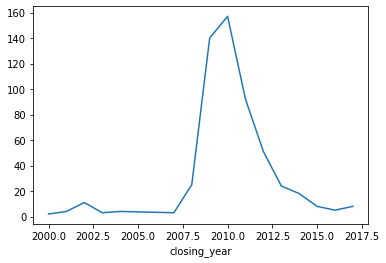

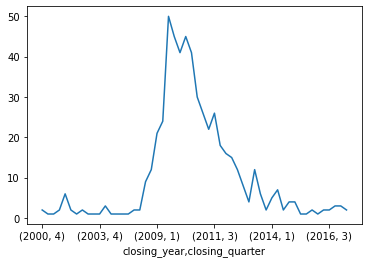

In [ ]:
#위 내용 그래프
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

In [ ]:
##### 테슬라 주식 데이터로 시간계산
%pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#https://data.nasdaq.com/ 에 가서 가입 > api키 생성
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdr

#tesla에 데이터프레임 저장
tesla = pdr.get_data_quandl('TSLA', api_key = 'apikey')

#tesla 저장된 df 파일로 저장
tesla.to_csv('./data/tesla_stock_quandl.csv')

In [ ]:
print(tesla.head())

              Open    High     Low   Close      Volume  ExDividend  \
Date                                                                 
2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
Date                                                                    
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0  
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0  
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0  
2018-03-22         1.0   313.89   318.82  308.18    309.10   4914307.0  
2018-03-21         1.0   310.25   322.44  310.19    316.53   5927881.0 

In [ ]:
#tesla 데이터프레임 Date열은 문자열로 저장되어 있음
    #datetime 오브젝트로 형변환해야 시간계산 가능
        #read_csv로 데이터 집합(csv파일) 불러올때 parse_dates인자로 Date열 전달
tesla = pd.read_csv('./data/tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())
print()
print(tesla.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        181 non-null    datetime64[ns]
 1   Open        181 non-null    float64       
 2   High        181 non-null    float64       
 3   Low         181 non-null    float64       
 4   Close       181 non-null    float64       
 5   Volume      181 non-null    float64       
 6   ExDividend  181 non-null    float64       
 7   SplitRatio  181 non-null    float64       
 8   AdjOpen     181 non-null    float64       
 9   AdjHigh     181 non-null    float64       
 10  AdjLow      181 non-null    float64       
 11  AdjClose    181 non-null    float64       
 12  AdjVolume   181 non-null    float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 18.5 KB
None

        Date    Open    High     Low   Close      Volume  ExDividend  \
0 2018-03-27  304.00  304.27  277.18

In [ ]:
#이제 Date열에 dt접근자 사용 가능 > 2017년 7월 데이터 추출해보자

print(tesla.loc[(tesla.Date.dt.year == 2017) & (tesla.Date.dt.month == 7)])


          Date    Open      High       Low   Close      Volume  ExDividend  \
164 2017-07-31  335.50  341.4900  321.0400  323.47   8499335.0         0.0   
165 2017-07-28  336.89  339.6000  332.5100  335.07   4841257.0         0.0   
166 2017-07-27  346.00  347.5000  326.2900  334.46   8259202.0         0.0   
167 2017-07-26  340.36  345.5000  338.1200  343.85   4750198.0         0.0   
168 2017-07-25  345.00  345.6000  334.1500  339.60   6958889.0         0.0   
169 2017-07-24  330.24  343.3990  330.0100  342.52   8552012.0         0.0   
170 2017-07-21  329.46  331.2575  325.8000  328.40   4826383.0         0.0   
171 2017-07-20  326.90  330.2200  324.2000  329.92   5098707.0         0.0   
172 2017-07-19  328.23  331.6500  323.2193  325.26   6300735.0         0.0   
173 2017-07-18  317.50  329.1300  315.6600  328.24   6326961.0         0.0   
174 2017-07-17  325.54  327.1000  313.4500  319.57   9784200.0         0.0   
175 2017-07-14  323.19  328.4200  321.2200  327.78   5590393.0  

##### datetime 오브젝트와 인덱스 - DatetimeIndex
    데이터프레임 인덱스로 datetime 오브젝트를 사용하면 원하는 시간 데이터를 바로 추출가능

In [ ]:
tesla.index = tesla['Date']
print(tesla.index)
print(tesla.head())

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2017-07-20', '2017-07-19', '2017-07-18', '2017-07-17',
               '2017-07-14', '2017-07-13', '2017-07-12', '2017-07-11',
               '2017-07-10', '2017-07-07'],
              dtype='datetime64[ns]', name='Date', length=181, freq=None)
                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316

In [ ]:
print(tesla['2017'].iloc[:5, :5])

                 Date    Open      High     Low   Close
Date                                                   
2017-12-29 2017-12-29  316.18  316.4100  310.00  311.35
2017-12-28 2017-12-28  311.75  315.8200  309.54  315.36
2017-12-27 2017-12-27  316.00  317.6800  310.75  311.64
2017-12-26 2017-12-26  323.83  323.9400  316.58  317.29
2017-12-22 2017-12-22  329.51  330.9214  324.82  325.20


C:\Users\Mok\AppData\Local\Temp/ipykernel_6952/3572161624.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2017'].iloc[:5, :5])


In [ ]:
print(tesla['2018-01'].iloc[:5, :5])

                 Date    Open    High     Low   Close
Date                                                 
2018-01-31 2018-01-31  347.51  356.19  345.19  354.42
2018-01-30 2018-01-30  345.14  348.27  342.17  345.82
2018-01-29 2018-01-29  339.85  350.85  338.28  349.53
2018-01-26 2018-01-26  341.50  344.00  335.71  342.85
2018-01-25 2018-01-25  348.27  349.20  336.40  337.64


C:\Users\Mok\AppData\Local\Temp/ipykernel_6952/3802496286.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(tesla['2018-01'].iloc[:5, :5])


##### 시간 간격과 인덱스 - TimedeltaIndex
    주식데이터 최초 5일간 수집된 데이터만 살펴보고 싶다면?
    > 시간 간격을 인덱스로 지정하여 데이터 출력

In [ ]:
# Date열에서 열의 최소값을 빼면 데이터 수집이후 시간이 얼마나 흘렀는지 알 수 있음
    #Date열에서 Date열의 최소값 뺀 후, ref_date열로 추가
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

In [ ]:
#인덱스로 ref_date열 지정
    #시간 간격(ref_date)로 데이터 추출가능
tesla.index = tesla['ref_date']
print(tesla.iloc[:5, :5])

               Date    Open    High     Low   Close
ref_date                                           
263 days 2018-03-27  304.00  304.27  277.18  279.18
262 days 2018-03-26  307.34  307.59  291.36  304.18
259 days 2018-03-23  311.25  311.61  300.45  301.54
258 days 2018-03-22  313.89  318.82  308.18  309.10
257 days 2018-03-21  310.25  322.44  310.19  316.53


In [ ]:
#데이터 수집 이후 10일 내, 최신 5일 데이터 추출(편의상 5열 까지만 출력)
print(tesla['10 days':].iloc[:5, :5])

               Date    Open    High     Low   Close
ref_date                                           
10 days  2017-07-17  325.54  327.10  313.45  319.57
7 days   2017-07-14  323.19  328.42  321.22  327.78
6 days   2017-07-13  330.11  331.60  319.97  323.41
5 days   2017-07-12  330.40  333.10  324.50  329.52
4 days   2017-07-11  316.00  327.28  314.30  327.22


##### 시간범위와 인덱스
    특정일 누락 데이터가 있다면, 어떻게 포함시킬지
    > 임의로 시간 범위 생성하여 인덱스로 지정

In [ ]:
#2015-01-01 데이터 누락확인
ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [ ]:
#2014-03-23 데이터 누락 확인
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [ ]:
#date_range메서드 사용, 2014-12-31 ~ 2015-01-05 사이 시간인덱스(DatetimeIndex) 생성
head_range = pd.date_range(start = '2014-12-31', end = '2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


##### 시간 범위의 주기 설정
    시간범위 인덱스 지정시 DatetimeIndex 자료형 생성
    DatetimeIndex 내, freq 속성값 지정하면 시간간격 조절가능
    freq 속성값 사용 가능한 시간주기 표
    
    시간주기    설명
    B           평일만 포함
    C           사용자가 정의한 평일만 포함
    D           달력 일자 단위
    W           주간 단위
    M           월 마지막 날만 포함
    SM          15일과 말일만 포함
    BM          M 주기의 값이 휴일이면 제외하고 평일만 포함
    CBM         BM에 사용자 정의 평일을 적용
    MS          월 시작일만 포함
    SMS         월 시작일과 15일만 포함
    BMS         MS 주기 값이 휴일이면 제외하고 평일만 포함
    CBMS        BMS에 사용자 정의 평일 적용
    Q           3, 6, 9, 12월 분기 말일만 포함
    BQ          3, 6, 9, 12월 분기 말일이 휴일이면 제외하고 평일만 포함
    QS          3, 6, 9, 12월 분기 시작일만 포함
    BQS         3, 6, 9, 12월 분기 시작일이 휴일이면 제외하고 평일만 포함
    A           년의 마지막 날만 포함
    BA          년의 마지막 날이 휴일이면 제외하고 평일만 포함
    AS          년의 시작일만 포함
    BAS         년의 시작일이 휴일이면 제외하고 평일만 포함
    BH          평일 시간 단위로 포함(09:00 ~ 16:00)
    H           시간 단위로 포함(00:00 ~ 00:00)
    T           분 단위 포함
    S           초 단위 포함
    L           밀리초 단위 포함
    U           마이크로초 단위 포함
    N           나노초 단위 포함

In [ ]:
#data_range 메서드의 freq 인자값 B로 설정, 평일만 포함시킨 DatetimeIndex 예시
print(pd.date_range('2017-01-01', '2017-01-07', freq = 'B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


##### 시간 범위 수정하고 데이터 밀어내기 - shift 메서드

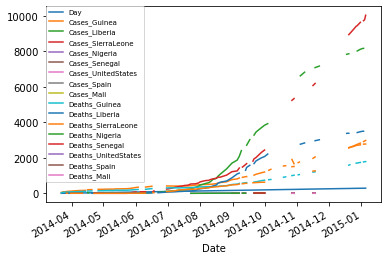

In [ ]:
#나라별 에볼라 확산 속도 비교
import matplotlib.pyplot as plt
ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

In [ ]:
#각 나라의 에볼라 발병일이 달라 시작점이 다름
    #확산속도를 제대로 비교하기 위해, 시작점을 동일시 시켜보자
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))
    #Liberia는 4일을 당겨야 함

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [ ]:
#제대로 된 확산속도 비교그래프 위한 데이터프레임 준비
ebola = pd.read_csv('./data/country_timeseries.csv', parse_dates=['Date'])
print(ebola.head().iloc[:, :5])
print()
print(ebola.tail().iloc[:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [ ]:
#Date열 인덱스로 지정
    #ebola데이터프레임 Date열 최대, 최소값 시간범위 지정 > new_idx로 저장
        #중간에 빈 날짜 데이터 인덱스 생성하려고함
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
print(ebola.head().iloc[:, :5])
print()
print(new_idx)

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [ ]:
#ebola인덱스는 내림차순 > new_idx를 역순으로해서 시간순서 맞춰 reindex
new_idx = reversed(new_idx)
ebola = ebola.reindex(new_idx)

print(ebola.head().iloc[:, :5])
print()
print(ebola.tail().iloc[:, :5])
    #비어있던 날짜가 생겨남 > 그래프를 위한 데이터프레임 준비완료

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22

In [ ]:
#last_valid_index, first_valid_index 메서드 이용, 각 나라의 에볼라 발병일 구함
    #각 메서드는 유효한 값이 있는 첫번째와 마지막 인덱스를 리턴
last_valid = ebola.apply(pd.Series.last_valid_index)    #가장 오래된 데이터 리턴
print(last_valid)
print()

first_valid = ebola.apply(pd.Series.first_valid_index)  #가장 최신의 데이터 리턴
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia      

In [ ]:
#각 나라의 에볼라 발병일을 동일한 출발선으로 옮기기
    #가장 처음 발병한 날(earliest_date)에서 각 나라 에볼라 발병일을 뺀만큼(shift_values) 옮기면 됨
        #우선 옮길 날(shift_values) 계산
earliest_date = ebola.index.min()
print(earliest_date)
print()

shift_values = last_valid - earliest_date
print(shift_values)


2014-03-22 00:00:00

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [ ]:
#shift메서드 : 인자값만큼 데이터를 밀어내는 메서드
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted
print(ebola_dict)


{'Date': Date
2015-01-05   2015-01-05
2015-01-04   2015-01-04
2015-01-03   2015-01-03
2015-01-02   2015-01-02
2015-01-01          NaT
                ...    
2014-03-26   2014-03-26
2014-03-25   2014-03-25
2014-03-24   2014-03-24
2014-03-23          NaT
2014-03-22   2014-03-22
Name: Date, Length: 290, dtype: datetime64[ns], 'Day': Date
2015-01-05    289.0
2015-01-04    288.0
2015-01-03    287.0
2015-01-02    286.0
2015-01-01      NaN
              ...  
2014-03-26      4.0
2014-03-25      3.0
2014-03-24      2.0
2014-03-23      NaN
2014-03-22      0.0
Name: Day, Length: 290, dtype: float64, 'Cases_Guinea': Date
2015-01-05    2776.0
2015-01-04    2775.0
2015-01-03    2769.0
2015-01-02       NaN
2015-01-01       NaN
               ...  
2014-03-26      86.0
2014-03-25      86.0
2014-03-24      86.0
2014-03-23       NaN
2014-03-22      49.0
Name: Cases_Guinea, Length: 290, dtype: float64, 'Cases_Liberia': Date
2015-01-05    NaN
2015-01-04    NaN
2015-01-03    NaN
2015-01-02    NaN
2015-01

In [ ]:
ebola_shift = pd.DataFrame(ebola_dict)
print(ebola_shift.tail().iloc[:, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN
2014-03-23        NaT  NaN           NaN            3.0                2.0
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0


In [ ]:
#인덱스 Day열로 지정 후, 그래프 필요없는 열 삭제
ebola_shift.index = ebola_shift['Day']
print(ebola_shift.tail().iloc[:, :5])
print()

ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)
print(ebola_shift.tail().iloc[:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Day                                                                
4.0 2014-03-26  4.0          86.0            8.0                2.0
3.0 2014-03-25  3.0          86.0            NaN                NaN
2.0 2014-03-24  2.0          86.0            7.0                NaN
NaN        NaT  NaN           NaN            3.0                2.0
0.0 2014-03-22  0.0          49.0            8.0                6.0

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  
Day        

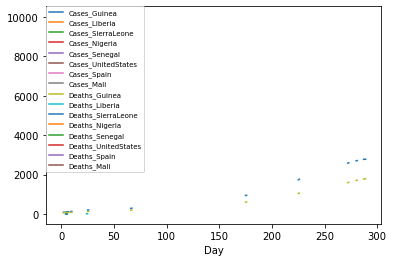

In [ ]:
#그래프 작성
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()

# 성능향상 - cython, numba 라이브러리

### 코드 성능 향상시켜 실행시간측정 - timeit
    timeit - 실행시간 측정에 사용하는 파이썬 문장
    실행시간 측정코드 앞에 %%timeit 이라고 씀
    주로 성능저하시키는 부분 확인을 위해 사용

In [ ]:
import pandas as pd
import numpy as np

##### 판다스 데이터프레임 - 실행시간 측정

In [ ]:
df = pd.DataFrame({'a':[10, 20, 30], 'b':[20, 30, 40]})

def avg_2_apply(row):
    x = row[0]
    y = row[1]
    if (x == 20):
        return np.nan
    else:
        return (x + y) / 2

In [ ]:
#판다스 데이터 프레임 실행시간 측정
%%timeit
df.apply(avg_2_apply, axis=1)

'''
319 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1바퀴 돌릴때 319마이크로초 +- 오차범위 2.63 마이크로 초

총 1000번 돌려서 나온 수치
'''

319 µs ± 2.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


##### 넘파이로 벡터화한 함수 사용 - 실행시간 측정


In [ ]:
@np.vectorize
def v_avg_2_mod(x, y):
    if (x==20):
        return(np.NaN)
    else:
        return (x + y) / 2

In [ ]:
%%timeit
v_avg_2_mod(df['a'], df['b'])

43.4 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


##### numba 라이브러리로 벡터화한 함수 사용 - 실행시간 측정

In [ ]:
import numba

@numba.vectorize
def v_avg_2_numba(x,y):
    if (int(x) == 20):
        return(np.NaN)
    else:
        return (x + y) / 2

In [ ]:
%%timeit
v_avg_2_numba(df['a'].values, df['b'].values)

7.16 µs ± 95.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


numba 라이브러리로 벡터화한 함수가 가장 빠른 연산속도를 보여줌

# 파이썬 콘퍼런스 소개
    최신 기술 동향 파악

### 파이콘
    규모가 큰 파이썬 콘퍼런스 중 하나
    https://www.youtube.com/channel/UC26x6D5xpKx6io4ShfXa_Ow

### 사이파이(SciPy), 유로 사이파이(EuroSciPy)
    과학 및 분석 주제에 파이썬 결합한 내용을 주로 다룸
    https://www.youtube.com/c/enthought/featured
    https://www.youtube.com/watch?v=ZlJ4NZoj1Lk
